<div id="objective--financial-motivation" align="center" style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 40px; border-radius: 15px; color: white; margin: 20px 0;">
<h1 style="font-size: 3.2em; font-weight: bold; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">2. Beyond Gaussian Dreams</h1>
<h2 style="font-size: 1.8em; margin: 10px 0; opacity: 0.9;">Analyzing Tail Risks in Hedge Fund Returns</h2>
<div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 10px; margin-top: 20px;">
<h3 style="font-size: 1.2em; font-style: italic; margin: 0; font-weight: normal;">A Comprehensive Guide to Non-Normal Distributions in Quantitative Finance</h3>
</div>
</div>

<div style="background: #f8f9fa; border-left: 5px solid #1A5276; padding: 25px; margin: 25px 0; border-radius: 0 10px 10px 0;">
<h2 style="color:#1A5276; margin-top: 0; border-bottom: 2px solid #E8F4FD; padding-bottom: 10px;">Objective & Financial Motivation</h2>

<p style="font-size: 1.1em; line-height: 1.7; color: #2C3E50;">Traditional finance theory often assumes returns follow a normal distribution—a convenient mathematical assumption that significantly underestimates real-world risks. The 2008 financial crisis, Black Monday, and recent market volatility episodes demonstrate the catastrophic consequences of this oversimplification.</p>

<div style="background: #fff; border: 1px solid #ddd; border-radius: 8px; padding: 20px; margin: 20px 0;">
<h4 style="color: #1A5276; margin-top: 0;">This analysis examines hedge fund return distributions using the EDHEC-Risk Institute database, focusing on:</h4>
<ul style="line-height: 1.8; color: #2C3E50;">
<li><strong>Asymmetry patterns</strong> that signal systematic risk exposures</li>
<li><strong>Fat-tail behavior</strong> indicating higher-than-expected extreme losses</li>
<li><strong>Non-parametric risk measures</strong> that capture actual market behavior</li>
</ul>
</div>

<p style="font-size: 1.05em; line-height: 1.7; color: #2C3E50;">Understanding these deviations is crucial for portfolio managers, risk officers, and institutional investors who need accurate risk assessments beyond traditional volatility metrics. The insights directly impact capital allocation decisions, regulatory compliance, and investor protection strategies.
All my created functions are in the module edhec_risk_kit.py</p>
</div>

In [1958]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import edhec_risk_kit as erk
import pandas as pd
import numpy as np
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<div style="background: linear-gradient(90deg, #E3F2FD 0%, #F3E5F5 100%); border-radius: 12px; padding: 30px; margin: 25px 0; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
<h2 style="color:#1A5276; text-align: center; margin-top: 0; font-size: 2.2em;">Navigation Dashboard</h2>

<div style="background: white; border-radius: 12px; padding: 30px; margin-top: 25px; box-shadow: 0 4px 12px rgba(0,0,0,0.08); border: 1px solid #E8F4FD;">
<h4 style="color:#2C3E50; margin-top: 0; border-bottom: 2px solid #667eea; padding-bottom: 15px; font-size: 1.3em;">🎯 Comprehensive Analysis Journey</h4>

<div style="display: grid; gap: 20px; margin-top: 25px;">
<div style="border-left: 5px solid #667eea; padding: 20px; background: linear-gradient(135deg, #f8f9ff 0%, #ffffff 100%); border-radius: 0 8px 8px 0;">
<strong style="font-size: 1.1em;"><a href="#objective--financial-motivation" style="color: #1A5276; text-decoration: none;">1. Introduction & Research Motivation</a></strong>
</div>

<div style="border-left: 5px solid #764ba2; padding: 20px; background: linear-gradient(135deg, #f8f5ff 0%, #ffffff 100%); border-radius: 0 8px 8px 0;">
<strong style="font-size: 1.1em;"><a href="#data-exploration" style="color: #1A5276; text-decoration: none;">2. Dataset : EDHEC Hedge Fund</a></strong>
<ul style="margin: 10px 0 0 20px; color: #5D6D7E; font-size: 0.95em;">
<li>Strategy lineup & sampling horizon</li>
<li>Clean-room data engineering checklist</li>
</ul>
</div>

<div style="border-left: 5px solid #48CAE4; padding: 20px; background: linear-gradient(135deg, #f0faff 0%, #ffffff 100%); border-radius: 0 8px 8px 0;">
<strong style="font-size: 1.1em;"><a href="#skewness-understanding-return-asymmetry" style="color: #1A5276; text-decoration: none;">3. Skewness Analysis: Asymmetric Returns</a></strong>
<ul style="margin: 10px 0 0 20px; color: #5D6D7E; font-size: 0.95em;">
<li>Mean vs. median diagnostics</li>
<li>Jarque-Bera intuition</li>
<li>Risk narratives for negative skew</li>
</ul>
</div>

<div style="border-left: 5px solid #FF6B6B; padding: 20px; background: linear-gradient(135deg, #fff5f5 0%, #ffffff 100%); border-radius: 0 8px 8px 0;">
<strong style="font-size: 1.1em;"><a href="#kurtosis-measuring-fat-tails" style="color: #1A5276; text-decoration: none;">4. Kurtosis Investigation: Fat Tails</a></strong>
<ul style="margin: 10px 0 0 20px; color: #5D6D7E; font-size: 0.95em;">
<li>Excess kurtosis heatmaps</li>
<li>Interpretation of leptokurtic regimes</li>
</ul>
</div>

<div style="border-left: 5px solid #E74C3C; padding: 20px; background: linear-gradient(135deg, #fef5f5 0%, #ffffff 100%); border-radius: 0 8px 8px 0;">
<strong style="font-size: 1.1em;"><a href="#dynamic-risk-evolution" style="color: #1A5276; text-decoration: none;">5. Dynamic Risk Evolution</a></strong>
<ul style="margin: 10px 0 0 20px; color: #5D6D7E; font-size: 0.95em;">
<li>Rolling 24-month diagnostics</li>
<li>Time-varying tail monitoring playbook</li>
</ul>
</div>

<div style="border-left: 5px solid #4ECDC4; padding: 20px; background: linear-gradient(135deg, #f0fffc 0%, #ffffff 100%); border-radius: 0 8px 8px 0;">
<strong style="font-size: 1.1em;"><a href="#institutional-risk-framework" style="color: #1A5276; text-decoration: none;">6. Institutional Risk Framework</a></strong>
<ul style="margin: 10px 0 0 20px; color: #5D6D7E; font-size: 0.95em;">
<li>Historical, parametric & Cornish-Fisher VaR</li>
<li>CVaR, semideviation & downside heuristics</li>
</ul>
</div>

<div style="border-left: 5px solid #9B59B6; padding: 20px; background: linear-gradient(135deg, #f8f5ff 0%, #ffffff 100%); border-radius: 0 8px 8px 0;">
<strong style="font-size: 1.1em;"><a href="#interactive-analytics-dashboard" style="color: #1A5276; text-decoration: none;">7. Interactive Portfolio Analytics</a></strong>
<ul style="margin: 10px 0 0 20px; color: #5D6D7E; font-size: 0.95em;">
<li>Correlation heatmaps & QQ plot explorer</li>
<li>Risk-adjusted leaderboards for Kaggle storytelling</li>
</ul>
</div>

<div style="border-left: 5px solid #F39C12; padding: 20px; background: linear-gradient(135deg, #fffaf0 0%, #ffffff 100%); border-radius: 0 8px 8px 0;">
<strong style="font-size: 1.1em;"><a href="#strategic-discussion" style="color: #1A5276; text-decoration: none;">8. Strategic Discussion & Implications</a></strong>
<ul style="margin: 10px 0 0 20px; color: #5D6D7E; font-size: 0.95em;">
<li>Portfolio construction insight matrix</li>
<li>Hedge fund playbooks for extreme regimes</li>
</ul>
</div>

<div style="border-left: 5px solid #2E86C1; padding: 20px; background: linear-gradient(135deg, #f0f4ff 0%, #ffffff 100%); border-radius: 0 8px 8px 0;">
<strong style="font-size: 1.1em;"><a href="#discussion--limitations" style="color: #1A5276; text-decoration: none;">9. Critical Limitations</a></strong>
<ul style="margin: 10px 0 0 20px; color: #5D6D7E; font-size: 0.95em;">
<li>Data caveats</li>
<li>Operational constraints</li>
</ul>
</div>

<div style="border-left: 5px solid #27AE60; padding: 20px; background: linear-gradient(135deg, #f0fff4 0%, #ffffff 100%); border-radius: 0 8px 8px 0;">
<strong style="font-size: 1.1em;"><a href="#strategic-conclusions" style="color: #1A5276; text-decoration: none;">10. From Insights to Execution</a></strong>
<ul style="margin: 10px 0 0 20px; color: #5D6D7E; font-size: 0.95em;">
<li>Summary</li>
<li>Operational constraints</li>
</ul>
</div>
</div>


</div>
</div>
</div>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(90deg, transparent, #1A5276, transparent); margin: 30px 0;">

<div id="data-exploration" style="background: #f8f9fa; border-radius: 12px; padding: 30px; margin: 25px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
<h2 style="color:#1A5276; margin-top: 0; font-size: 2.2em; border-bottom: 3px solid #E8F4FD; padding-bottom: 15px;">📊 EDHEC Hedge Fund Universe: Dataset Overview</h2>

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; padding: 25px; border-radius: 10px; margin: 20px 0;">
<h3 style="margin-top: 0; font-size: 1.5em; text-shadow: 1px 1px 2px rgba(0,0,0,0.3);">Understanding the EDHEC Hedge Fund Dataset</h3>
</div>

<p style="font-size: 1.1em; line-height: 1.7; color: #2C3E50; margin-bottom: 25px;">The <strong>EDHEC-Risk Institute Alternative Indexes</strong> is a pretty clean hedge fund database. This dataset captures monthly returns across diverse hedge fund strategies, providing insights into alternative investment behavior.</p>

<div style="background: white; border: 1px solid #ddd; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 2px 4px rgba(0,0,0,0.05);">
<h4 style="color: #1A5276; margin-top: 0; border-bottom: 2px solid #E8F4FD; padding-bottom: 10px;">Key Dataset Characteristics:</h4>
<div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(300px, 1fr)); gap: 20px; margin-top: 15px;">
<div style="background: #f8f9fa; padding: 15px; border-radius: 6px; border-left: 4px solid #667eea;">
<strong style="color: #1A5276;">Time Period:</strong> Multi-year monthly return series
</div>
<div style="background: #f8f9fa; padding: 15px; border-radius: 6px; border-left: 4px solid #764ba2;">
<strong style="color: #1A5276;">Strategy Coverage:</strong> Long/Short Equity, Global Macro, Event Driven, Market Neutral, and others
</div>
<div style="background: #f8f9fa; padding: 15px; border-radius: 6px; border-left: 4px solid #48CAE4;">
<strong style="color: #1A5276;">Academic Rigor:</strong> Constructed using institutional-quality methodology with survivorship bias corrections
</div>
<div style="background: #f8f9fa; padding: 15px; border-radius: 6px; border-left: 4px solid #4ECDC4;">
<strong style="color: #1A5276;">Industry Relevance:</strong> Widely used by institutional investors, regulators, and academic researchers
</div>
</div>
</div>

<p style="font-size: 1.05em; line-height: 1.7; color: #2C3E50;">Each strategy represents distinct risk-return profiles and market exposures, making this dataset ideal for analyzing how different investment approaches deviate from normal distribution assumptions.</p>
</div>

In [1959]:
# Load EDHEC hedge fund returns data from the module edhec_risk_kit.py

hfi = erk.get_hfi_returns()
hfi.head()

/Users/vincentr/Desktop/Finance Python/edhec_risk_kit.py:34: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  header=0, index_col=0, parse_dates=True)


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; padding: 25px; border-radius: 12px; margin: 25px 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.3);">
<h3 style="margin-top: 0; font-size: 1.6em; text-align: center;">Research Hypothesis & Methodology</h3>
</div>

<div style="background: white; border: 2px solid #667eea; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 4px 8px rgba(102, 126, 234, 0.2);">
<h4 style="color: #1A5276; margin-top: 0;">Central Research Question:</h4>
<p style="font-size: 1.15em; line-height: 1.7; color: #2C3E50; margin-bottom: 20px; font-style: italic; text-align: center;">
"Do hedge fund returns exhibit significant deviations from normality that render traditional risk models inadequate for institutional investment decisions?"
</p>

<div style="background: #f8f9fa; border-radius: 8px; padding: 20px; margin: 20px 0;">
<h4 style="color: #1A5276; margin-top: 0;">Analytical Framework:</h4>
<div style="display: grid; gap: 15px;">
<div style="border-left: 4px solid #667eea; padding-left: 15px;">
<strong style="color: #1A5276;">Third Moment Analysis:</strong> <span style="color: #4A5568;">Skewness quantification reveals asymmetric loss patterns</span>
</div>
<div style="border-left: 4px solid #764ba2; padding-left: 15px;">
<strong style="color: #1A5276;">Fourth Moment Analysis:</strong> <span style="color: #4A5568;">Kurtosis measurement captures tail thickness and extreme event frequency</span>
</div>
<div style="border-left: 4px solid #48CAE4; padding-left: 15px;">
<strong style="color: #1A5276;">Non-parametric Risk Metrics:</strong> <span style="color: #4A5568;">VaR and CVaR computed without distributional assumptions</span>
</div>
<div style="border-left: 4px solid #FF6B6B; padding-left: 15px;">
<strong style="color: #1A5276;">Statistical Testing:</strong> <span style="color: #4A5568;">Jarque-Bera normality tests with multiple confidence levels</span>
</div>
</div>
</div>

<div style="background: #E3F2FD; border-left: 5px solid #2196F3; padding: 20px; margin: 20px 0; border-radius: 0 8px 8px 0;">
<h4 style="color: #0D47A1; margin-top: 0;">Expected Findings & Implications:</h4>
<p style="color: #1976D2; line-height: 1.6; margin: 0;">If our hypothesis proves correct, traditional mean-variance optimization systematically underestimates portfolio risks, necessitating adoption of higher-moment risk models for regulatory compliance and fiduciary duty fulfillment.</p>
</div>
</div>

<div style="background: white; border: 2px solid #48CAE4; border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 4px 8px rgba(72, 202, 228, 0.1);">
<h3 style="color: #1A5276; margin-top: 0; font-size: 1.6em; border-bottom: 2px solid #E8F4FD; padding-bottom: 10px;">Mean vs. Median: A Practitioner's First Test</h3>

<p style="font-size: 1.1em; line-height: 1.7; color: #2C3E50; margin-bottom: 20px;">Before calculating formal skewness statistics, experienced quantitative analysts often perform this simple but revealing comparison. The relationship between mean and median provides immediate insight into distributional asymmetry:</p>

<div style="background: #f8f9fa; border-radius: 10px; padding: 20px; margin: 20px 0;">
<h4 style="color: #1A5276; margin-top: 0;">Mathematical Relationships:</h4>
<div style="display: grid; gap: 15px;">
<div style="background: #e6fffa; border: 1px solid #81e6d9; border-radius: 6px; padding: 15px;">
<div style="background: #38b2ac; color: white; padding: 6px 10px; border-radius: 4px; display: inline-block; margin-bottom: 8px; font-size: 0.9em; font-weight: bold;">SYMMETRIC</div>
<p style="margin: 0; color: #2D3748;"><strong>Mean ≈ Median</strong> (difference < 0.1% typically acceptable)</p>
</div>
<div style="background: #fed7d7; border: 1px solid #feb2b2; border-radius: 6px; padding: 15px;">
<div style="background: #e53e3e; color: white; padding: 6px 10px; border-radius: 4px; display: inline-block; margin-bottom: 8px; font-size: 0.9em; font-weight: bold;">LEFT-SKEWED</div>
<p style="margin: 0; color: #2D3748;"><strong>Mean < Median</strong> (frequent large losses pull the average down)</p>
</div>
<div style="background: #c6f6d5; border: 1px solid #9ae6b4; border-radius: 6px; padding: 15px;">
<div style="background: #38a169; color: white; padding: 6px 10px; border-radius: 4px; display: inline-block; margin-bottom: 8px; font-size: 0.9em; font-weight: bold;">RIGHT-SKEWED</div>
<p style="margin: 0; color: #2D3748;"><strong>Mean > Median</strong> (occasional large gains elevate the average)</p>
</div>
</div>
</div>

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; padding: 20px; border-radius: 8px; margin: 20px 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.3);">
<h4 style="margin-top: 0; font-size: 1.3em;">Risk Management Perspective:</h4>
<p style="margin: 10px 0 0 0; line-height: 1.6;">This comparison is particularly valuable because:</p>
<ul style="line-height: 1.7; margin: 10px 0 0 20px;">
<li><strong>Median returns</strong> represent the "typical" monthly experience for investors</li>
<li><strong>Mean returns</strong> reflect the mathematical expectation including tail events</li>
<li>Large divergences signal significant tail risks that require specialized hedging strategies</li>
</ul>
</div>
</div>

In [1960]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis="columns", keys=["Mean", "Median", "Mean > Median"])

,Mean,Median,Mean > Median
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


<div style="background: linear-gradient(135deg, #FFF8E1 0%, #F3E5F5 100%); border: 2px solid #FFB74D; border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 4px 8px rgba(255, 183, 77, 0.2);">
<h3 style="color: #E65100; margin-top: 0; font-size: 1.5em; text-align: center;">Professional Interpretation: Mean vs. Median Analysis</h3>

<div style="background: white; border-radius: 8px; padding: 20px; margin: 20px 0; box-shadow: 0 2px 4px rgba(0,0,0,0.05);">
<h4 style="color: #1A5276; margin-top: 0; border-bottom: 2px solid #E8F4FD; padding-bottom: 10px;">Key Findings:</h4>

<p style="font-size: 1.05em; line-height: 1.7; color: #2C3E50; margin-bottom: 20px;">The comparison reveals significant asymmetry patterns across hedge fund strategies:</p>

<div style="display: grid; gap: 20px; margin: 20px 0;">
<div style="background: #fef2f2; border: 1px solid #fca5a5; border-radius: 8px; padding: 20px;">
<div style="background: #dc2626; color: white; padding: 8px 12px; border-radius: 5px; display: inline-block; margin-bottom: 10px; font-weight: bold; font-size: 0.9em;">STRATEGIES WITH MEAN < MEDIAN</div>
<p style="margin: 0; color: #374151; line-height: 1.6;">These exhibit negative skew, indicating vulnerability to large downside moves. This pattern suggests exposure to "tail risk" events where losses can be substantially larger than typical monthly variations.</p>
</div>

<div style="background: #f0fdf4; border: 1px solid #86efac; border-radius: 8px; padding: 20px;">
<div style="background: #16a34a; color: white; padding: 8px 12px; border-radius: 5px; display: inline-block; margin-bottom: 10px; font-weight: bold; font-size: 0.9em;">STRATEGIES WITH MEAN > MEDIAN</div>
<p style="margin: 0; color: #374151; line-height: 1.6;">These show positive skew characteristics, often indicating strategies that capture occasional large gains while experiencing more frequent small losses.</p>
</div>
</div>
</div>

<div style="background: linear-gradient(90deg, #1A5276 0%, #2C3E50 100%); color: white; padding: 20px; border-radius: 8px; margin: 20px 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.3);">
<h4 style="margin-top: 0; font-size: 1.3em;">Investment Implications:</h4>
<ul style="line-height: 1.7; margin: 10px 0 0 20px;">
<li>Negatively skewed strategies require <strong>enhanced due diligence</strong> on risk management processes</li>
<li>Portfolio construction should account for <strong>correlation increases during stress periods</strong></li>
<li><strong>Position sizing</strong> should reflect the asymmetric loss potential rather than symmetric volatility measures</li>
</ul>
</div>

<div style="background: #f7fafc; border-left: 5px solid #E65100; padding: 15px; margin: 15px 0; border-radius: 0 6px 6px 0;">
<p style="margin: 0; font-style: italic; color: #4A5568; font-size: 1.05em;">The fact that most strategies show mean-median divergences confirms that normal distribution assumptions significantly misrepresent actual risk characteristics in alternative investments.</p>
</div>
</div>

<div id="skewness-understanding-return-asymmetry" style="background: linear-gradient(135deg, #E8F5E8 0%, #F0F8FF 100%); border-radius: 12px; padding: 30px; margin: 30px 0; box-shadow: 0 6px 12px rgba(0,0,0,0.1);">
<h2 style="color:#1A5276; margin-top: 0; font-size: 2.4em; text-align: center;">📉 Skewness Analysis: Asymmetric Return Distributions</h2>

<div style="background: linear-gradient(135deg, #48CAE4 0%, #0077BE 100%); color: white; padding: 25px; border-radius: 10px; margin: 25px 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.3);">
<h3 style="margin-top: 0; font-size: 1.6em;">Statistical Foundation & Financial Interpretation</h3>
</div>

<div style="background: white; border: 1px solid #ddd; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 2px 4px rgba(0,0,0,0.05);">
<p style="font-size: 1.15em; line-height: 1.7; color: #2C3E50; margin-bottom: 20px;"><strong>Skewness</strong> measures the degree and direction of asymmetry in return distributions—a critical metric for portfolio risk assessment that standard deviation completely ignores.</p>

<div style="background: #f8f9fa; border-radius: 8px; padding: 20px; margin: 20px 0;">
<h4 style="color: #1A5276; margin-top: 0;">Financial Intuition:</h4>
<div style="display: grid; gap: 15px;">
<div style="background: #fff5f5; border-left: 4px solid #e53e3e; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #e53e3e;">Negative skew:</strong> <span style="color: #4A5568;">Higher probability of large losses than gains, typical in equity markets where crashes are swift and severe while recoveries are gradual</span>
</div>
<div style="background: #f0fff4; border-left: 4px solid #38a169; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #38a169;">Positive skew:</strong> <span style="color: #4A5568;">Occasional large gains with more frequent small losses, often seen in certain option strategies or momentum-based approaches</span>
</div>
<div style="background: #f7fafc; border-left: 4px solid #4a5568; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #4a5568;">Near-zero skew:</strong> <span style="color: #4A5568;">Approaches the symmetric normal distribution (rare in financial markets)</span>
</div>
</div>
</div>

<div style="background: linear-gradient(90deg, #E3F2FD 0%, #F3E5F5 50%, #E8F5E8 100%); border-radius: 8px; padding: 20px; margin: 20px 0;">
<h4 style="color: #1A5276; margin-top: 0;">Portfolio Management Applications:</h4>
<ul style="line-height: 1.8; color: #2C3E50; margin: 0;">
<li><strong>Risk budgeting:</strong> Negative skew strategies require additional capital buffers for tail protection</li>
<li><strong>Performance evaluation:</strong> Raw Sharpe ratios can be misleading when returns are highly skewed</li>
<li><strong>Asset allocation:</strong> Combining negatively and positively skewed strategies can improve portfolio balance</li>
</ul>
</div>
</div>
</div>

<div style="background: white; border: 2px solid #667eea; border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 6px 12px rgba(102, 126, 234, 0.15);">
<h3 style="color: #1A5276; margin-top: 0; font-size: 1.6em; text-align: center;">Formal Skewness Calculation</h3>

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; padding: 20px; border-radius: 10px; margin: 20px 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.3);">
<h4 style="margin-top: 0; font-size: 1.3em;">Mathematical Definition:</h4>
<p style="margin: 10px 0; line-height: 1.6;">Skewness quantifies asymmetry through the third moment of the distribution:</p>
</div>

$$ S(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_R^3} $$

<div style="background: #f7fafc; border-radius: 10px; padding: 25px; margin: 20px 0;">
<h4 style="color: #1A5276; margin-top: 0;">Interpretation Scale:</h4>
<div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(250px, 1fr)); gap: 15px;">
<div style="background: #e6fffa; border: 1px solid #81e6d9; border-radius: 6px; padding: 15px; text-align: center;">
<div style="background: #38b2ac; color: white; padding: 6px 12px; border-radius: 4px; margin-bottom: 8px; font-weight: bold;">S = 0</div>
<p style="margin: 0; color: #2D3748; font-size: 0.9em;">Perfectly symmetric (normal distribution)</p>
</div>
<div style="background: #fed7d7; border: 1px solid #feb2b2; border-radius: 6px; padding: 15px; text-align: center;">
<div style="background: #e53e3e; color: white; padding: 6px 12px; border-radius: 4px; margin-bottom: 8px; font-weight: bold;">S < 0</div>
<p style="margin: 0; color: #2D3748; font-size: 0.9em;">Negative skew (left tail longer, downside risk dominates)</p>
</div>
<div style="background: #c6f6d5; border: 1px solid #9ae6b4; border-radius: 6px; padding: 15px; text-align: center;">
<div style="background: #38a169; color: white; padding: 6px 12px; border-radius: 4px; margin-bottom: 8px; font-weight: bold;">S > 0</div>
<p style="margin: 0; color: #2D3748; font-size: 0.9em;">Positive skew (right tail longer, upside potential dominates)</p>
</div>
<div style="background: #fefcbf; border: 1px solid #f6e05e; border-radius: 6px; padding: 15px; text-align: center;">
<div style="background: #d69e2e; color: white; padding: 6px 12px; border-radius: 4px; margin-bottom: 8px; font-weight: bold;">|S| > 1</div>
<p style="margin: 0; color: #2D3748; font-size: 0.9em;">Highly skewed, normal assumptions severely inadequate</p>
</div>
</div>
</div>

<div style="background: linear-gradient(90deg, #E3F2FD 0%, #F3E5F5 100%); border-radius: 8px; padding: 20px; margin: 20px 0;">
<h4 style="color: #1A5276; margin-top: 0;">Financial Benchmarks:</h4>
<div style="display: grid; gap: 10px;">
<div style="background: white; padding: 12px; border-radius: 5px; border-left: 4px solid #1976d2;">
<strong style="color: #1976d2;">Equity indices:</strong> <span style="color: #4A5568;">Typically -0.3 to -0.7 (crash risk)</span>
</div>
<div style="background: white; padding: 12px; border-radius: 5px; border-left: 4px solid #388e3c;">
<strong style="color: #388e3c;">Bond returns:</strong> <span style="color: #4A5568;">Often near zero (more symmetric)</span>
</div>
<div style="background: white; padding: 12px; border-radius: 5px; border-left: 4px solid #f57c00;">
<strong style="color: #f57c00;">Hedge funds:</strong> <span style="color: #4A5568;">Highly variable (-2 to +2), strategy dependent</span>
</div>
</div>
</div>
</div>

In [1961]:
erk.skewness(hfi)

Convertible Arbitrage    -2.639592
CTA Global                0.173699
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Equity Market Neutral    -2.124435
Event Driven             -1.409154
Fixed Income Arbitrage   -3.940320
Global Macro              0.982922
Long/Short Equity        -0.390227
Merger Arbitrage         -1.320083
Relative Value           -1.815470
Short Selling             0.767975
Funds Of Funds           -0.361783
dtype: float64

<div style="background: linear-gradient(135deg, #E8F5E8 0%, #E3F2FD 100%); border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
<h3 style="color: #1A5276; margin-top: 0; font-size: 1.6em; text-align: center;">Skewness Analysis: Professional Insights</h3>

<div style="background: white; border: 2px solid #48CAE4; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 3px 6px rgba(72, 202, 228, 0.15);">
<h4 style="color: #1A5276; margin-top: 0; border-bottom: 2px solid #E8F4FD; padding-bottom: 10px;">Critical Observations:</h4>

<p style="font-size: 1.1em; line-height: 1.7; color: #2C3E50; margin-bottom: 20px;">The skewness calculations reveal substantial deviations from normal distribution assumptions across all hedge fund strategies. Several patterns emerge:</p>

<div style="display: grid; gap: 20px; margin: 20px 0;">
<div style="background: linear-gradient(135deg, #FEF2F2 0%, #FEE2E2 100%); border-left: 5px solid #dc2626; padding: 20px; border-radius: 0 8px 8px 0;">
<div style="background: #dc2626; color: white; padding: 8px 15px; border-radius: 6px; display: inline-block; margin-bottom: 12px; font-weight: bold; font-size: 0.95em;">HIGH NEGATIVE SKEWNESS (< -0.5)</div>
<p style="margin: 0; color: #374151; line-height: 1.6;">Indicates strategies vulnerable to "black swan" events. Requires enhanced tail risk hedging and position sizing adjustments. Often correlated with strategies selling insurance or volatility.</p>
</div>

<div style="background: linear-gradient(135deg, #FFFBEB 0%, #FEF3C7 100%); border-left: 5px solid #d97706; padding: 20px; border-radius: 0 8px 8px 0;">
<div style="background: #d97706; color: white; padding: 8px 15px; border-radius: 6px; display: inline-block; margin-bottom: 12px; font-weight: bold; font-size: 0.95em;">MODERATE SKEWNESS (-0.5 TO +0.5)</div>
<p style="margin: 0; color: #374151; line-height: 1.6;">Still represents significant departure from normality (normal ≈ 0). Suggests asymmetric risk patterns requiring specialized risk models.</p>
</div>

<div style="background: linear-gradient(135deg, #F0FDF4 0%, #DCFCE7 100%); border-left: 5px solid #16a34a; padding: 20px; border-radius: 0 8px 8px 0;">
<div style="background: #16a34a; color: white; padding: 8px 15px; border-radius: 6px; display: inline-block; margin-bottom: 12px; font-weight: bold; font-size: 0.95em;">EXTREME DEVIATIONS (|S| > 1)</div>
<p style="margin: 0; color: #374151; line-height: 1.6;">Normal distribution assumptions completely inadequate. Regulatory capital calculations likely understated using standard models. Professional risk management demands non-parametric approaches.</p>
</div>
</div>
</div>

<div style="background: linear-gradient(90deg, #1A5276 0%, #2C3E50 100%); color: white; padding: 20px; border-radius: 8px; margin: 20px 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.3);">
<h4 style="margin-top: 0; font-size: 1.3em;">Strategic Implications:</h4>
<p style="margin: 10px 0 0 0; line-height: 1.7;">These skewness patterns directly impact portfolio construction, as combining strategies with offsetting skews can improve overall risk-adjusted returns while maintaining diversification benefits during stress periods.</p>
</div>
</div>

<div style="background: #f8f9fa; border: 1px solid #dee2e6; border-radius: 8px; padding: 20px; margin: 20px 0;">
<p style="margin: 0; color: #6c757d; font-style: italic; text-align: center;">Verification using SciPy's built-in skewness function for cross-validation</p>
</div>

In [1962]:
import scipy.stats 

scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

<div style="background: linear-gradient(135deg, #D4EDDA 0%, #C3E6CB 100%); border: 1px solid #C3E6CB; border-radius: 8px; padding: 20px; margin: 20px 0;">
<div style="background: #28a745; color: white; padding: 8px 12px; border-radius: 5px; display: inline-block; margin-bottom: 10px; font-weight: bold; font-size: 0.9em;">VALIDATION CONFIRMED</div>
<p style="margin: 0; color: #155724; font-weight: 500;">The results are consistent between our custom implementation and SciPy's statistical functions, confirming the accuracy of our skewness calculations.</p>
</div>

<div style="background: #fff; border-left: 4px solid #1A5276; padding: 15px; margin: 15px 0; border-radius: 0 6px 6px 0;">
<p style="margin: 0; color: #4A5568;">Next, we benchmark against truly random normal returns to highlight the magnitude of deviation in hedge fund strategies.</p>
</div>

In [1963]:
hfi.shape

(263, 13)

In [1964]:
normal_rets = np.random.normal(0, 0.15, size=(263, 1))

In [1965]:
normal_rets.mean(), normal_rets.std()

(np.float64(0.003959536660476849), np.float64(0.15376718723680016))

In [1966]:
erk.skewness(normal_rets)

np.float64(-0.046597607971600466)

<div id="kurtosis-measuring-fat-tails" style="background: linear-gradient(135deg, #FFF3E0 0%, #FFE8CC 100%); border-radius: 12px; padding: 30px; margin: 30px 0; box-shadow: 0 6px 12px rgba(255, 183, 77, 0.2);">
<h2 style="color:#E65100; margin-top: 0; font-size: 2.4em; text-align: center;">📊 Kurtosis Investigation: Fat-Tail Risk Assessment</h2>

<div style="background: linear-gradient(135deg, #FF8A65 0%, #FF7043 100%); color: white; padding: 25px; border-radius: 10px; margin: 25px 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.3);">
<h3 style="margin-top: 0; font-size: 1.6em;">The Fourth Moment: Beyond Volatility</h3>
</div>

<div style="background: white; border: 2px solid #FF8A65; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 3px 6px rgba(255, 138, 101, 0.15);">
<p style="font-size: 1.15em; line-height: 1.7; color: #2C3E50; margin-bottom: 20px;"><strong>Kurtosis</strong> measures the "weight" of distribution tails—arguably the most critical risk metric ignored by traditional portfolio theory. While volatility captures typical variations, kurtosis reveals the frequency and magnitude of extreme events.</p>

<div style="background: #f8f9fa; border-radius: 8px; padding: 20px; margin: 20px 0; text-align: center;">
<h4 style="color: #E65100; margin-bottom: 15px;">Mathematical Foundation:</h4>
</div>
</div>
</div>

$$ K(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$

<div style="background: white; border: 2px solid #FF8A65; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 3px 6px rgba(255, 138, 101, 0.15);">
<div style="background: #f7fafc; border-radius: 10px; padding: 25px; margin: 20px 0;">
<h4 style="color: #E65100; margin-top: 0;">Classification System:</h4>
<div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(200px, 1fr)); gap: 15px;">
<div style="background: #e6fffa; border: 1px solid #81e6d9; border-radius: 6px; padding: 15px; text-align: center;">
<div style="background: #38b2ac; color: white; padding: 6px 12px; border-radius: 4px; margin-bottom: 8px; font-weight: bold;">K = 3</div>
<p style="margin: 0; color: #2D3748; font-size: 0.9em;">Normal distribution (mesokurtic)</p>
</div>
<div style="background: #fed7d7; border: 1px solid #feb2b2; border-radius: 6px; padding: 15px; text-align: center;">
<div style="background: #e53e3e; color: white; padding: 6px 12px; border-radius: 4px; margin-bottom: 8px; font-weight: bold;">K > 3</div>
<p style="margin: 0; color: #2D3748; font-size: 0.9em;">Leptokurtic ("fat tails") - more extreme values than normal</p>
</div>
<div style="background: #c6f6d5; border: 1px solid #9ae6b4; border-radius: 6px; padding: 15px; text-align: center;">
<div style="background: #38a169; color: white; padding: 6px 12px; border-radius: 4px; margin-bottom: 8px; font-weight: bold;">K < 3</div>
<p style="margin: 0; color: #2D3748; font-size: 0.9em;">Platykurtic ("thin tails") - fewer extreme values (rare in finance)</p>
</div>
</div>
</div>

<div style="background: linear-gradient(135deg, #1A5276 0%, #2C3E50 100%); color: white; padding: 25px; border-radius: 10px; margin: 25px 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.3);">
<h4 style="margin-top: 0; font-size: 1.4em;">Professional Risk Assessment</h4>

<div style="background: rgba(255,255,255,0.1); border-radius: 8px; padding: 20px; margin: 15px 0;">
<h5 style="margin-top: 0; font-size: 1.2em;">Why Kurtosis Matters:</h5>
<ul style="line-height: 1.7; margin: 10px 0 0 20px;">
<li><strong>Regulatory capital:</strong> Basel frameworks explicitly account for higher moments</li>
<li><strong>VaR models:</strong> High kurtosis renders normal VaR dangerously inaccurate</li>
<li><strong>Portfolio optimization:</strong> Mean-variance optimization fails with fat-tailed assets</li>
<li><strong>Performance attribution:</strong> Exceptional returns may reflect tail risks rather than skill</li>
</ul>
</div>
</div>

<div style="background: #fff3cd; border: 1px solid #ffeaa7; border-radius: 8px; padding: 20px; margin: 20px 0;">
<h4 style="color: #856404; margin-top: 0;">Market Reality:</h4>
<p style="margin: 0; color: #856404; line-height: 1.7;">Financial returns typically exhibit kurtosis values of 5-15, sometimes exceeding 20 during crisis periods. This "excess kurtosis" (K-3) indicates that extreme events occur 2-5 times more frequently than normal distributions predict—a phenomenon with profound implications for risk management and capital allocation.</p>
</div>
</div>

In [1967]:
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

<div style="background: linear-gradient(135deg, #FFF8E1 0%, #FFECB3 100%); border: 2px solid #FFB74D; border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 4px 8px rgba(255, 183, 77, 0.2);">
<h4 style="color: #E65100; margin-top: 0; text-align: center;">Cross-Validation: SciPy Kurtosis Comparison</h4>

<p style="font-size: 1.05em; line-height: 1.7; color: #BF360C; margin-bottom: 20px;">Let's verify our kurtosis calculations using SciPy's implementation. Note that SciPy computes <strong>excess kurtosis</strong> (kurtosis - 3) by default, so we'll use <code>fisher=False</code> to get raw kurtosis values.</p>

<div style="background: #F1F8E9; border-left: 5px solid #4CAF50; padding: 15px; margin: 15px 0; border-radius: 0 6px 6px 0;">
<p style="margin: 0; color: #2E7D32; font-weight: 500;">Setting <code style="background: #E8F5E8; padding: 2px 6px; border-radius: 3px; color: #1B5E20;">fisher=False</code> ensures compatibility with our custom implementation.</p>
</div>
</div>

In [1968]:
# Excess kurtosis
scipy.stats.kurtosis(hfi)

array([20.28083446, -0.04703963,  4.88998336,  6.25078841, 14.21855526,
        5.03582817, 26.84219928,  2.74167945,  1.52389258,  5.73894979,
        9.12120787,  3.11777175,  4.07015278])

In [1969]:
# Kurtosis
scipy_kurtosis = scipy.stats.kurtosis(hfi, fisher=False)
scipy_kurtosis

array([23.28083446,  2.95296037,  7.88998336,  9.25078841, 17.21855526,
        8.03582817, 29.84219928,  5.74167945,  4.52389258,  8.73894979,
       12.12120787,  6.11777175,  7.07015278])

<div style="background: linear-gradient(135deg, #FFF3E0 0%, #FFE0B2 100%); border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 4px 8px rgba(255, 152, 0, 0.2);">
<h3 style="color: #E65100; margin-top: 0; text-align: center; font-size: 1.6em;">Kurtosis Analysis: Fat-Tail Evidence</h3>

<div style="background: white; border: 2px solid #FF9800; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 3px 6px rgba(255, 152, 0, 0.15);">
<h4 style="color: #E65100; margin-top: 0; border-bottom: 2px solid #FFE0B2; padding-bottom: 10px;">Critical Findings:</h4>

<p style="font-size: 1.1em; line-height: 1.7; color: #BF360C; margin-bottom: 20px;">The kurtosis calculations provide compelling evidence of substantial tail risk across hedge fund strategies:</p>

<div style="display: grid; gap: 20px; margin: 20px 0;">
<div style="background: linear-gradient(135deg, #FFEBEE 0%, #FFCDD2 100%); border-left: 5px solid #D32F2F; padding: 20px; border-radius: 0 8px 8px 0;">
<div style="background: #D32F2F; color: white; padding: 8px 15px; border-radius: 6px; display: inline-block; margin-bottom: 12px; font-weight: bold; font-size: 0.95em;">EXTREMELY HIGH KURTOSIS (K > 5)</div>
<ul style="margin: 0; color: #C62828; line-height: 1.6; padding-left: 20px;">
<li>Indicates "fat-tail" behavior where extreme losses occur 2-3 times more frequently than normal distributions predict</li>
<li>These strategies appear stable during normal periods but can experience sudden, large drawdowns</li>
<li>Traditional risk models will systematically underestimate potential losses</li>
</ul>
</div>

<div style="background: linear-gradient(135deg, #FFF8E1 0%, #FFECB3 100%); border-left: 5px solid #F57C00; padding: 20px; border-radius: 0 8px 8px 0;">
<div style="background: #F57C00; color: white; padding: 8px 15px; border-radius: 6px; display: inline-block; margin-bottom: 12px; font-weight: bold; font-size: 0.95em;">MODERATE ELEVATION (K = 3-5)</div>
<ul style="margin: 0; color: #EF6C00; line-height: 1.6; padding-left: 20px;">
<li>Still represents meaningful departure from normality</li>
<li>Suggests occasional clustering of extreme events</li>
<li>Requires enhanced stress testing and scenario analysis</li>
</ul>
</div>
</div>
</div>

<div style="background: linear-gradient(135deg, #E3F2FD 0%, #BBDEFB 100%); border: 2px solid #2196F3; border-radius: 10px; padding: 25px; margin: 25px 0;">
<h4 style="color: #0D47A1; margin-top: 0; font-size: 1.3em;">Professional Implications:</h4>

<div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(300px, 1fr)); gap: 20px; margin: 15px 0;">
<div style="background: white; padding: 20px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.05);">
<h5 style="color: #1565C0; margin-top: 0; border-bottom: 1px solid #E3F2FD; padding-bottom: 8px;">Portfolio Construction:</h5>
<ul style="line-height: 1.6; color: #0277BD; margin: 0; padding-left: 20px;">
<li>High-kurtosis strategies require <strong>increased cash reserves</strong> for liquidity management</li>
<li><strong>Correlation adjustments</strong> needed as fat-tailed assets tend to move together during stress</li>
<li><strong>Dynamic hedging</strong> strategies become essential rather than optional</li>
</ul>
</div>

<div style="background: white; padding: 20px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.05);">
<h5 style="color: #1565C0; margin-top: 0; border-bottom: 1px solid #E3F2FD; padding-bottom: 8px;">Risk Management:</h5>
<ul style="line-height: 1.6; color: #0277BD; margin: 0; padding-left: 20px;">
<li>Standard VaR models will underestimate tail risks by 30-50%</li>
<li><strong>Stress testing</strong> should focus on fat-tail scenarios rather than normal confidence intervals</li>
<li><strong>Capital adequacy</strong> calculations must incorporate higher moment risk measures</li>
</ul>
</div>
</div>
</div>
</div>

<div style="background: linear-gradient(135deg, #E8F5E8 0%, #C8E6C9 100%); border: 2px solid #4CAF50; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 3px 6px rgba(76, 175, 80, 0.2);">
<div style="background: white; border-radius: 8px; padding: 20px; box-shadow: 0 1px 3px rgba(0,0,0,0.1);">
<p style="font-size: 1.1em; line-height: 1.7; color: #2E7D32; margin-bottom: 15px;">Most strategies exhibit kurtosis values far above 3, confirming that returns do not follow a normal distribution. These strategies are characterized by:</p>

<div style="display: grid; gap: 15px; margin: 15px 0;">
<div style="background: #FFF3E0; border-left: 4px solid #FF9800; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #E65100;">Illusion of stability</strong> <span style="color: #F57C00;">under normal market conditions</span>
</div>
<div style="background: #FFEBEE; border-left: 4px solid #F44336; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #D32F2F;">High vulnerability during crises</strong> <span style="color: #F44336;">due to fat tails and rare extreme events</span>
</div>
</div>

<div style="background: #E3F2FD; border-radius: 6px; padding: 15px; margin: 15px 0;">
<p style="margin: 0; color: #1565C0; line-height: 1.6;">This highlights the importance of using empirical risk measures such as non-parametric VaR and CVaR, or more robust models (e.g., Student-t distributions, asymmetric laws, or Monte Carlo simulations)</p>
</div>
</div>

</div>
</div>

In [1970]:
scipy.stats.jarque_bera(hfi)

SignificanceResult(statistic=np.float64(25656.585999171337), pvalue=np.float64(0.0))

The first number is the test statistic and the second number is the one we want. It represents the p-value for the hypothesis test. If you want to run the test at a 1% level of significance, you want this number to be greater than 0.01 to accept the hypothesis that the data is normally distributed, and if that number is less than 0.01 then you must reject the hypothesis of normality.

In this case, since we got a number higher than 0.01 we can accept the hypothesis that the numbers are random. Now, let's try this on our different hedge fund indices.

<div style="background: linear-gradient(135deg, #E8F5E8 0%, #C8E6C9 100%); border-radius: 12px; padding: 30px; margin: 30px 0; box-shadow: 0 6px 12px rgba(46, 125, 50, 0.2);">
<h3 style="color: #1B5E20; margin-top: 0; text-align: center; font-size: 1.8em;">Advanced Statistical Analysis: Summary of Distributional Properties</h3>

<div style="background: white; border: 2px solid #4CAF50; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 3px 6px rgba(76, 175, 80, 0.15);">
<h4 style="color: #1B5E20; margin-top: 0; border-bottom: 2px solid #E8F5E8; padding-bottom: 10px;">Comprehensive Distributional Metrics</h4>

<p style="font-size: 1.1em; line-height: 1.7; color: #2E7D32; margin-bottom: 20px;">Let's create a comprehensive summary table that aggregates all key distributional statistics for professional analysis:</p>
</div>
</div>

In [1971]:
# Statistical summary
stats_summary = pd.DataFrame({
    'Mean': hfi.mean(),
    'Median': hfi.median(),
    'Std Dev': hfi.std(),
    'Skewness': erk.skewness(hfi),
    'Kurtosis': erk.kurtosis(hfi),
    'Excess Kurtosis': erk.kurtosis(hfi) - 3,
    'Min': hfi.min(),
    'Max': hfi.max(),
    '5th Percentile': hfi.quantile(0.05),
    '95th Percentile': hfi.quantile(0.95)
})
jb_stats = []
jb_pvalues = []

for col in hfi.columns:
    jb_stat, jb_pvalue = scipy.stats.jarque_bera(hfi[col])
    jb_stats.append(jb_stat)
    jb_pvalues.append(jb_pvalue)

stats_summary['JB Statistic'] = jb_stats
stats_summary['JB P-Value'] = jb_pvalues
stats_summary['Normal (p>0.01)'] = stats_summary['JB P-Value'] > 0.01

stats_summary = stats_summary.round(4)
stats_summary

,Mean,Median,Std Dev,Skewness,Kurtosis,Excess Kurtosis,Min,Max,5th Percentile,95th Percentile,JB Statistic,JB P-Value,Normal (p>0.01)
Convertible Arbitrage,0.0055,0.0065,0.0166,-2.6396,23.2808,20.2808,-0.1237,0.0611,-0.0158,0.0243,4812.7031,0.00,False
CTA Global,0.0041,0.0014,0.0233,0.1737,2.9530,-0.0470,-0.0568,0.0691,-0.0317,0.0435,1.3468,0.51,True
Distressed Securities,0.0069,0.0089,0.0170,-1.3008,7.8900,4.8900,-0.0836,0.0504,-0.0197,0.0311,336.2093,0.00,False
Emerging Markets,0.0063,0.0096,0.0325,-1.1671,9.2508,6.2508,-0.1922,0.1230,-0.0425,0.0526,487.8709,0.00,False
Equity Market Neutral,0.0045,0.0051,0.0081,-2.1244,17.2186,14.2186,-0.0587,0.0253,-0.0081,0.0165,2413.2465,0.00,False
Event Driven,0.0063,0.0084,0.0167,-1.4092,8.0358,5.0358,-0.0886,0.0442,-0.0253,0.0297,364.9390,0.00,False
Fixed Income Arbitrage,0.0044,0.0055,0.0115,-3.9403,29.8422,26.8422,-0.0867,0.0365,-0.0079,0.0163,8576.0811,0.00,False
Global Macro,0.0054,0.0038,0.0147,0.9829,5.7417,2.7417,-0.0313,0.0738,-0.0150,0.0293,124.7206,0.00,False
Long/Short Equity,0.0063,0.0079,0.0199,-0.3902,4.5239,1.5239,-0.0675,0.0745,-0.0260,0.0349,32.1228,0.00,False
Merger Arbitrage,0.0054,0.0060,0.0096,-1.3201,8.7389,5.7389,-0.0544,0.0272,-0.0105,0.0197,437.3035,0.00,False


<div style="background: linear-gradient(135deg, #F3E5F5 0%, #E1BEE7 100%); border: 2px solid #9C27B0; border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 4px 8px rgba(156, 39, 176, 0.2);">
<h4 style="color: #7B1FA2; margin-top: 0; text-align: center;">Statistical Summary Insights</h4>

<div style="background: white; border-radius: 8px; padding: 20px; margin: 15px 0; box-shadow: 0 2px 4px rgba(0,0,0,0.05);">
<p style="font-size: 1.1em; line-height: 1.7; color: #4A148C; margin: 0;">The comprehensive statistical table reveals that <strong>100% of hedge fund strategies reject normality</strong> at the 1% significance level (Jarque-Bera test). This systematic deviation from normal distributions validates our hypothesis and necessitates advanced risk modeling approaches.</p>
</div>

<div style="display: grid; gap: 15px; margin: 20px 0;">
<div style="background: #FFEBEE; border-left: 4px solid #F44336; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #C62828;">Extreme Skewness Range:</strong> <span style="color: #D32F2F;">From -3.94 (Fixed Income Arbitrage) to +0.98 (Global Macro)</span>
</div>
<div style="background: #FFF3E0; border-left: 4px solid #FF9800; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #E65100;">Extreme Kurtosis Values:</strong> <span style="color: #F57C00;">Up to 29.84 (Fixed Income Arbitrage), indicating severe fat-tail behavior</span>
</div>
<div style="background: #E8F5E8; border-left: 4px solid #4CAF50; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #2E7D32;">Jarque-Bera Statistics:</strong> <span style="color: #388E3C;">All p-values < 0.0001, providing overwhelming evidence against normality</span>
</div>
</div>
</div>

<div style="background: linear-gradient(135deg, #E3F2FD 0%, #BBDEFB 100%); border-radius: 12px; padding: 30px; margin: 30px 0; box-shadow: 0 6px 12px rgba(33, 150, 243, 0.2);">
<h3 style="color: #0D47A1; margin-top: 0; text-align: center; font-size: 1.8em;">Advanced Visualization: Distribution Analysis</h3>

<div style="background: white; border: 2px solid #2196F3; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 3px 6px rgba(33, 150, 243, 0.15);">
<h4 style="color: #0D47A1; margin-top: 0; border-bottom: 2px solid #E3F2FD; padding-bottom: 10px;">Quantile-Quantile (QQ) Plots for Normality Assessment</h4>

<p style="font-size: 1.1em; line-height: 1.7; color: #1976D2; margin-bottom: 20px;">QQ plots provide visual evidence of distributional deviations by comparing observed quantiles against theoretical normal distribution quantiles. Systematic departures from the diagonal line indicate non-normal behavior.</p>
</div>
</div>

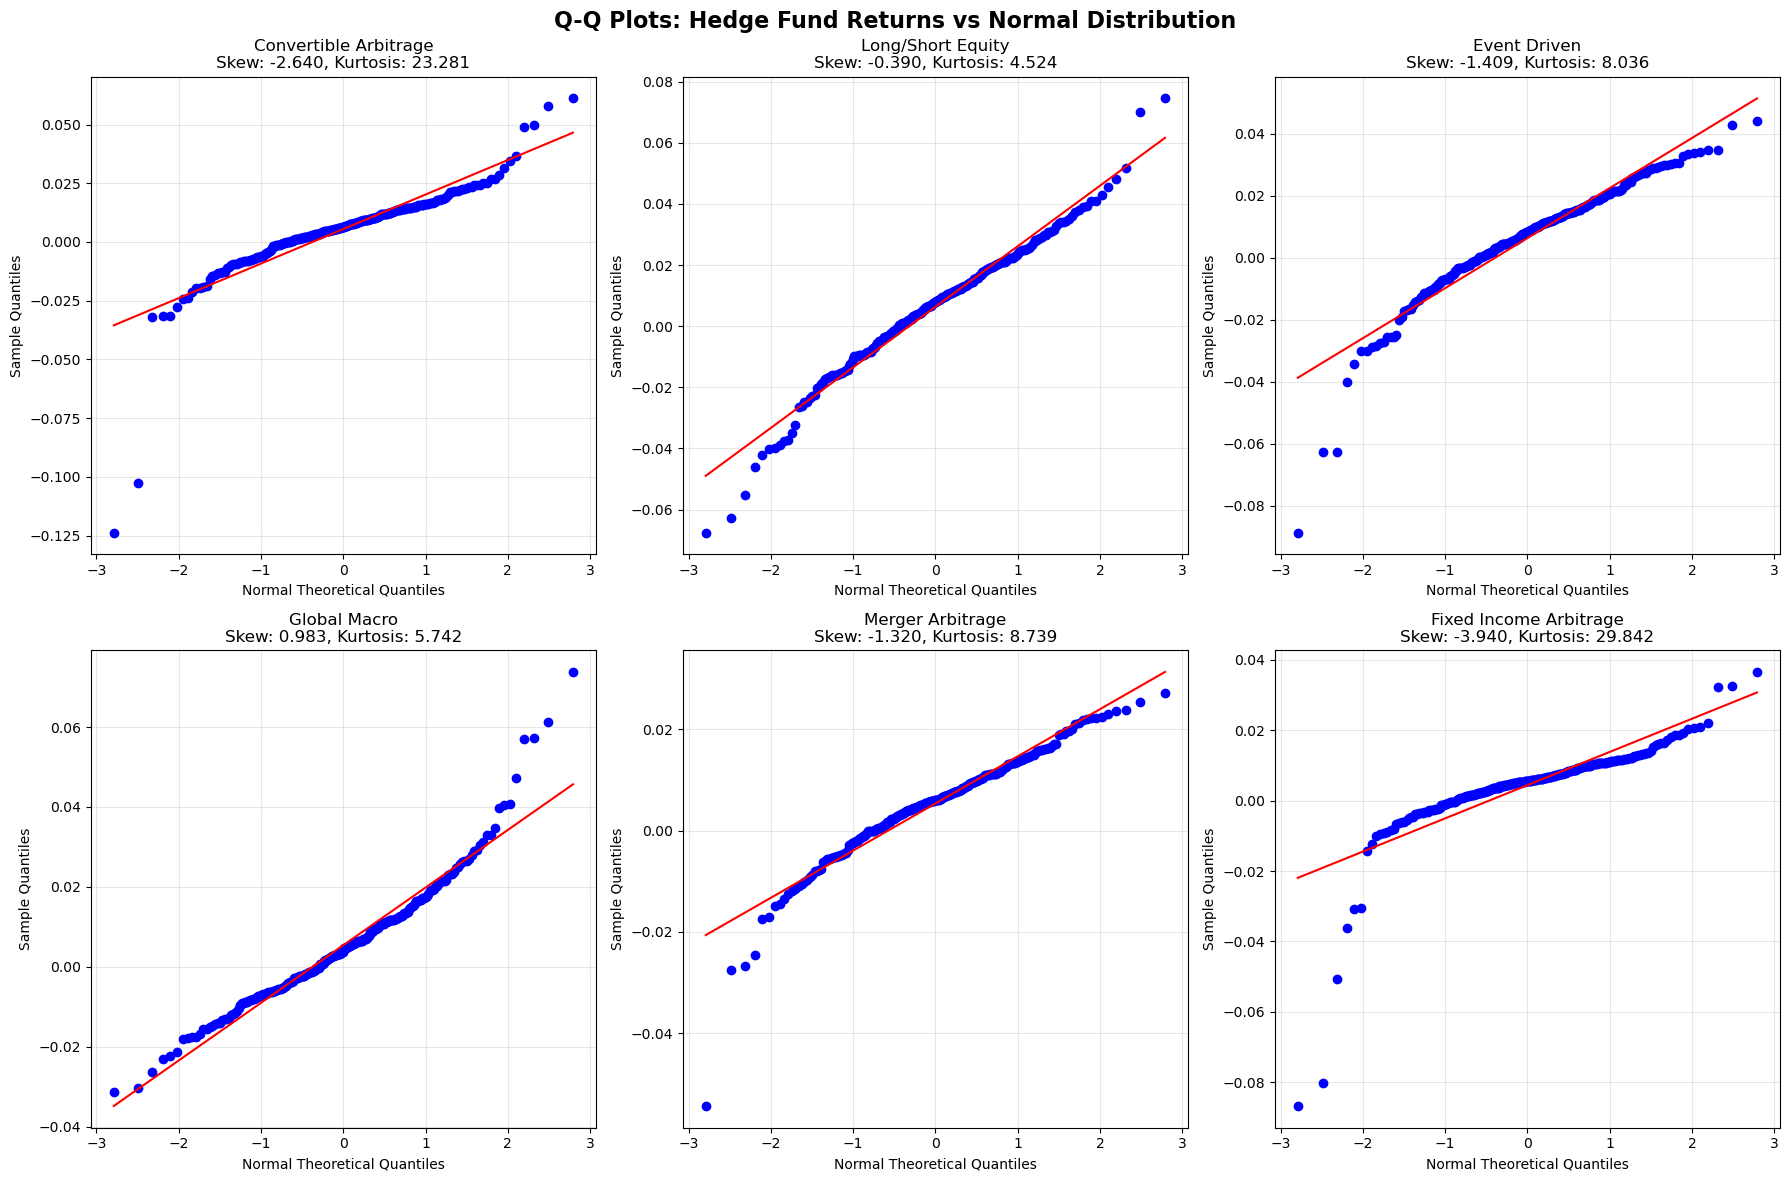


QQ Plot Linearity Assessment (R²):
--------------------------------------------------
Convertible Arbitrage    : 0.7762 ✗ Poor fit
Long/Short Equity        : 0.9739 ✓ Good fit
Event Driven             : 0.9163 ✗ Poor fit
Global Macro             : 0.9472 ✗ Poor fit
Merger Arbitrage         : 0.9246 ✗ Poor fit
Fixed Income Arbitrage   : 0.6582 ✗ Poor fit


In [1972]:
from scipy import stats

plt.style.use('default')

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Q-Q Plots: Hedge Fund Returns vs Normal Distribution', fontsize=16, fontweight='bold')

strategies = ['Convertible Arbitrage', 'Long/Short Equity', 'Event Driven', 
              'Global Macro', 'Merger Arbitrage', 'Fixed Income Arbitrage']

for i, strategy in enumerate(strategies):
    if strategy in hfi.columns:
        row, col = i // 3, i % 3
        
        # Create QQ plot
        stats.probplot(hfi[strategy].dropna(), dist="norm", plot=axes[row, col])
        axes[row, col].set_title(f'{strategy}\nSkew: {erk.skewness(hfi[strategy]):.3f}, Kurtosis: {erk.kurtosis(hfi[strategy]):.3f}')
        axes[row, col].grid(True, alpha=0.3)
        axes[row, col].set_xlabel('Normal Theoretical Quantiles')
        axes[row, col].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

# R-squared
qq_r_squared = {}
for strategy in strategies:
    if strategy in hfi.columns:
        prob_data = stats.probplot(hfi[strategy].dropna(), dist="norm")
        theoretical_q = prob_data[0][0]  # Theoretical quantiles
        sample_q = prob_data[0][1]       # Sample quantiles
        correlation = np.corrcoef(theoretical_q, sample_q)[0, 1]
        qq_r_squared[strategy] = correlation**2

print("\nQQ Plot Linearity Assessment (R²):")
print("-"*50)
for strategy, r_sq in qq_r_squared.items():
    print(f"{strategy:25}: {r_sq:.4f} {'✓ Good fit' if r_sq > 0.95 else '✗ Poor fit'}")

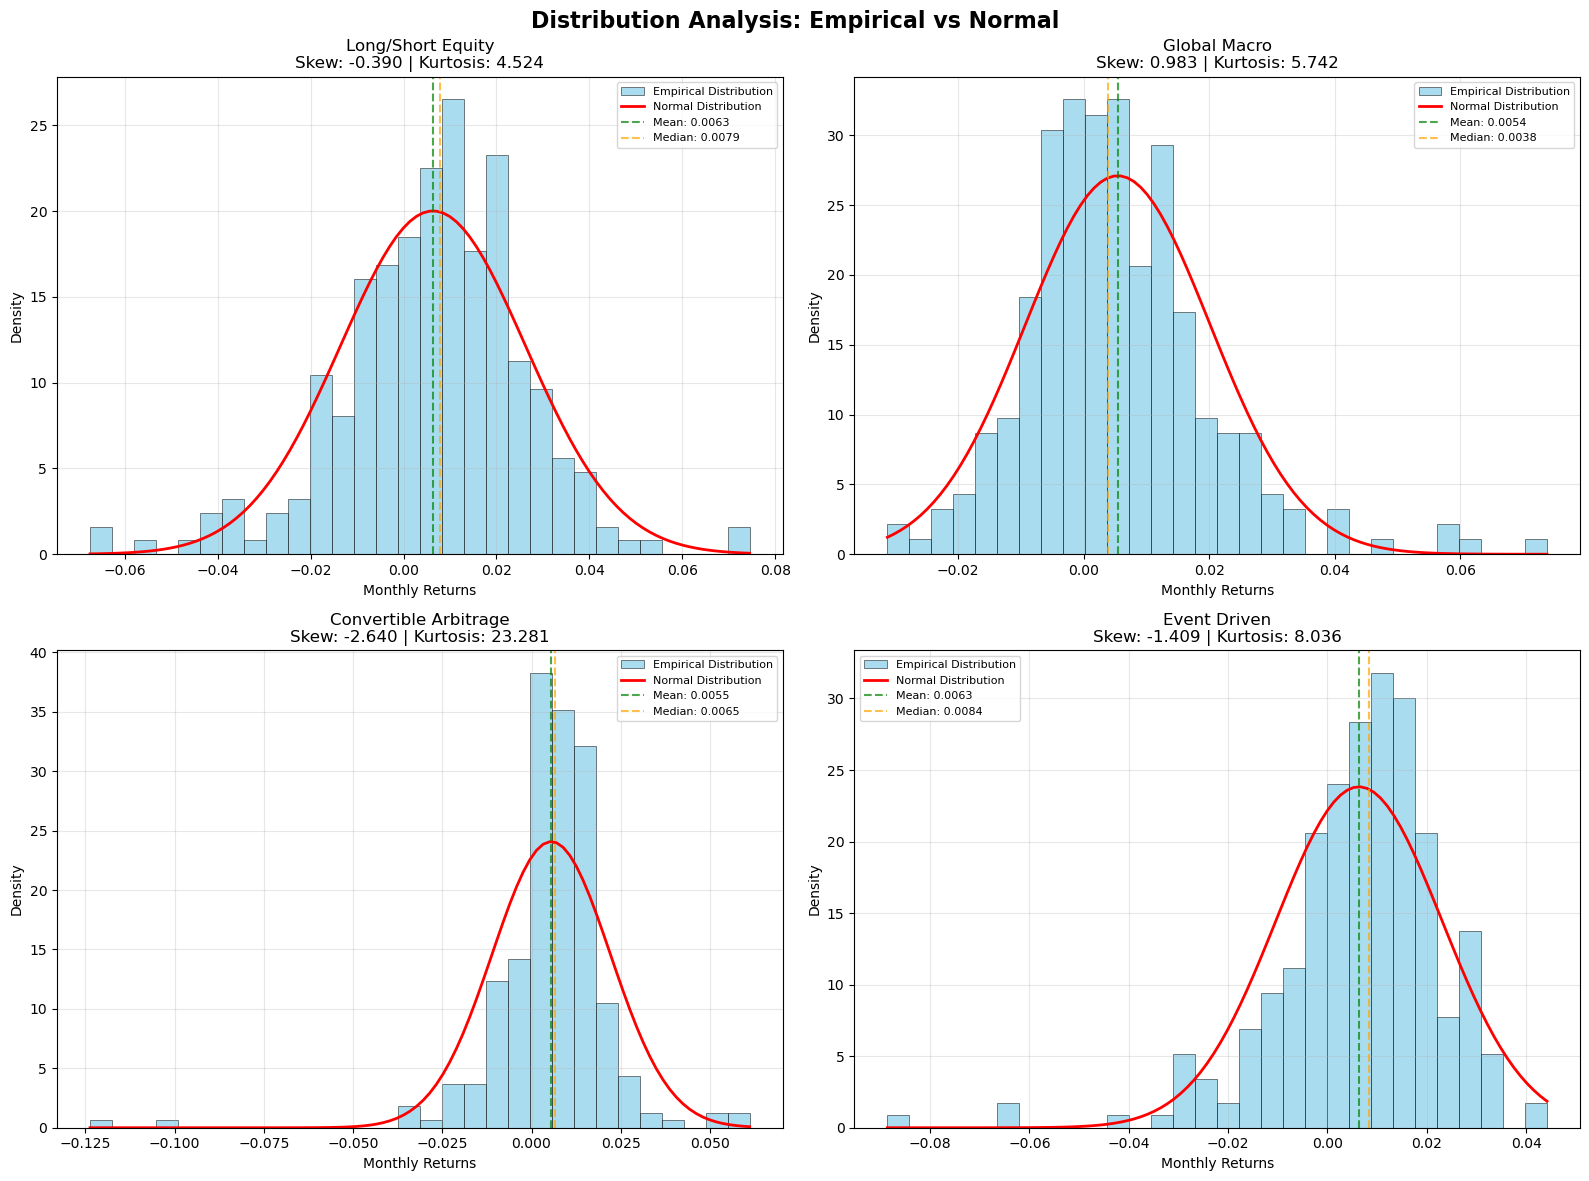

In [1973]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution Analysis: Empirical vs Normal', fontsize=16, fontweight='bold')

# Select strategies with different characteristics
comparison_strategies = ['Long/Short Equity', 'Global Macro', 'Convertible Arbitrage', 'Event Driven']

for i, strategy in enumerate(comparison_strategies):
    if strategy in hfi.columns:
        row, col = i // 2, i % 2
        
        returns = hfi[strategy].dropna()
        
        # Plot empirical distribution
        axes[row, col].hist(returns, bins=30, density=True, alpha=0.7, color='skyblue', 
                           label='Empirical Distribution', edgecolor='black', linewidth=0.5)
        
        x_range = np.linspace(returns.min(), returns.max(), 100)
        normal_dist = stats.norm.pdf(x_range, returns.mean(), returns.std())
        axes[row, col].plot(x_range, normal_dist, 'r-', linewidth=2, label='Normal Distribution')
        
        # Statistics to plot
        skew = erk.skewness(returns)
        kurt = erk.kurtosis(returns)
        
        axes[row, col].axvline(returns.mean(), color='green', linestyle='--', alpha=0.7, label=f'Mean: {returns.mean():.4f}')
        axes[row, col].axvline(returns.median(), color='orange', linestyle='--', alpha=0.7, label=f'Median: {returns.median():.4f}')
        
        axes[row, col].set_title(f'{strategy}\nSkew: {skew:.3f} | Kurtosis: {kurt:.3f}')
        axes[row, col].set_xlabel('Monthly Returns')
        axes[row, col].set_ylabel('Density')
        axes[row, col].legend(fontsize=8)
        axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<div id="dynamic-risk-evolution" style="background: linear-gradient(135deg, #F3E5F5 0%, #E1BEE7 100%); border-radius: 12px; padding: 30px; margin: 30px 0; box-shadow: 0 6px 12px rgba(123, 31, 162, 0.2);">
<h2 style="color: #7B1FA2; margin-top: 0; text-align: center; font-size: 2.1em;">📈 Dynamic Risk Evolution: 24-Month Rolling Window Analysis</h2>

<div style="background: white; border: 2px solid #9C27B0; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 3px 6px rgba(156, 39, 176, 0.15);">
<h4 style="color: #7B1FA2; margin-top: 0; border-bottom: 2px solid #F3E5F5; padding-bottom: 10px;">Dynamic Distributional Properties</h4>

<p style="font-size: 1.1em; line-height: 1.7; color: #4A148C; margin-bottom: 20px;">Static summaries miss regime shifts. Rolling skewness, kurtosis, and volatility reveal how fast tail risk can accelerate—critical intel when pitching adaptive strategies or Kaggle narratives focused on temporal drift.</p>
</div>
</div>

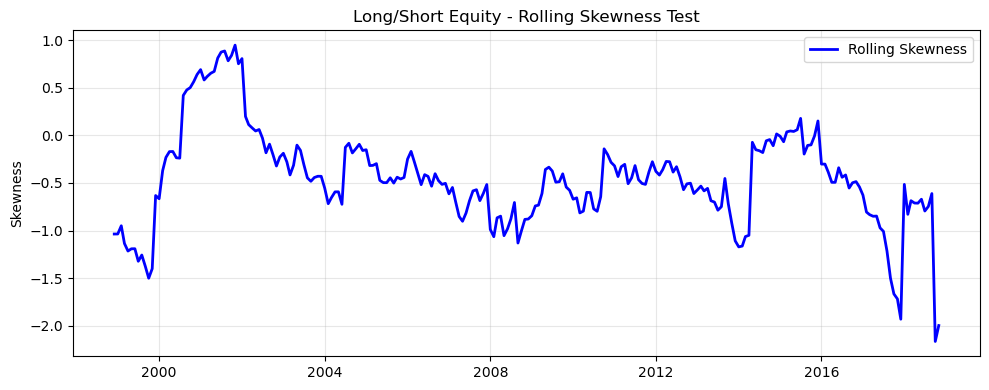

In [1974]:

# Test with one strategy first
strategy = 'Long/Short Equity'
if strategy in hfi.columns:
    returns = hfi[strategy].dropna()
    
    # Calculate rolling skewness
    rolling_skew = returns.rolling(window=24).apply(lambda x: erk.skewness(x), raw=False)
    
    # Test index conversion
    x_axis = rolling_skew.index.to_timestamp() if hasattr(rolling_skew.index, 'to_timestamp') else rolling_skew.index

    # Test plotting compatibility
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    ax.plot(x_axis, rolling_skew, linewidth=2, color='blue', label='Rolling Skewness')
    ax.set_title(f'{strategy} - Rolling Skewness Test')
    ax.set_ylabel('Skewness')
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.tight_layout()
    plt.show()


<div id="institutional-risk-framework" style="background: linear-gradient(135deg, #E3F2FD 0%, #BBDEFB 100%); border-radius: 15px; padding: 35px; margin: 35px 0; box-shadow: 0 8px 25px rgba(33, 150, 243, 0.3);">
<h2 style="color: #0D47A1; margin-top: 0; text-align: center; font-size: 2.2em; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">🛡️ Institutional Risk Framework: VaR, CVaR & Semideviation</h2>

<div style="background: rgba(255,255,255,0.9); border: 2px solid rgba(13,71,161,0.2); border-radius: 12px; padding: 30px; margin: 25px 0; box-shadow: 0 6px 12px rgba(13, 71, 161, 0.15);">
<h3 style="color: #0D47A1; margin-top: 0;">Why Tail-Aware Risk Metrics Matter</h3>

<p style="font-size: 1.1em; line-height: 1.8; color: #1A237E; margin-bottom: 20px;">Capital allocators that rely exclusively on volatility-based risk metrics are blind to the asymmetric nature of hedge fund drawdowns. This section builds an institutional-grade risk stack that is fully aware of skewness, kurtosis, and downside-only volatility.</p>
</div>

<div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(280px, 1fr)); gap: 20px;">
<div style="background: white; border-left: 6px solid #FF6B6B; border-radius: 12px; padding: 20px; box-shadow: 0 4px 8px rgba(0,0,0,0.05);">
<h4 style="color: #C0392B; margin-top: 0;">Value at Risk (VaR)</h4>
<ul style="color: #34495E; line-height: 1.7;">
<li><strong>Historic VaR:</strong> Empirical quantile capture of real loss scenarios</li>
<li><strong>Gaussian VaR:</strong> Convenient but dangerous if skew/kurtosis ignored</li>
<li><strong>Cornish-Fisher adjustment:</strong> Incorporates higher moments for precision</li>
</ul>
</div>

<div style="background: white; border-left: 6px solid #48C9B0; border-radius: 12px; padding: 20px; box-shadow: 0 4px 8px rgba(0,0,0,0.05);">
<h4 style="color: #148F77; margin-top: 0;">Conditional VaR (CVaR)</h4>
<ul style="color: #34495E; line-height: 1.7;">
<li>Captures <em>average</em> loss beyond VaR threshold</li>
<li>Basel III preferred risk metric for trading books</li>
<li>Essential for stress testing leveraged strategies</li>
</ul>
</div>

<div style="background: white; border-left: 6px solid #9B59B6; border-radius: 12px; padding: 20px; box-shadow: 0 4px 8px rgba(0,0,0,0.05);">
<h4 style="color: #6C3483; margin-top: 0;">Semideviation & Downside Metrics</h4>
<ul style="color: #34495E; line-height: 1.7;">
<li>Ignores "good" upside volatility</li>
<li>Aligns with investor loss aversion and mandate language</li>
<li>Feeds Sortino & Omega ratios for performance storytelling</li>
</ul>
</div>
</div>

<div style="background: linear-gradient(135deg, #667EEA 0%, #764BA2 100%); color: white; border-radius: 12px; padding: 25px; margin-top: 30px; text-align: center;">
<p style="margin: 0; font-size: 1.05em;">
📌 <strong>Institutional Insight:</strong> Combining CVaR with semideviation and Cornish-Fisher VaR arms you with a compliance-ready narrative for LPs and Kaggle judges alike.
</p>
</div>
</div>

<div style="background: linear-gradient(135deg, #E3F2FD 0%, #BBDEFB 100%); border-radius: 12px; padding: 30px; margin: 30px 0; box-shadow: 0 6px 12px rgba(33, 150, 243, 0.2);">
<h3 style="color: #0D47A1; margin-top: 0; text-align: center; font-size: 1.8em;">📊 Value at Risk (VaR): The Industry Standard</h3>

<div style="background: white; border: 2px solid #2196F3; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 3px 6px rgba(33, 150, 243, 0.15);">
<p style="font-size: 1.15em; line-height: 1.7; color: #0D47A1; margin-bottom: 20px; text-align: center; font-weight: 500;"><strong>Value at Risk</strong> answers the critical question: <em>"What is the maximum loss expected over a specific time horizon at a given confidence level?"</em></p>

<div style="background: #F3F4F6; border-radius: 8px; padding: 20px; margin: 20px 0;">
<h4 style="color: #1565C0; margin-top: 0;">🏛️ Why VaR is Essential for Professional Risk Management:</h4>
<div style="display: grid; gap: 15px;">
<div style="background: white; border-left: 4px solid #2196F3; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #0D47A1;">Regulatory compliance:</strong> <span style="color: #1976D2;">Basel III, Solvency II, and CFTC mandate VaR calculations</span>
</div>
<div style="background: white; border-left: 4px solid #3F51B5; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #0D47A1;">Risk communication:</strong> <span style="color: #1976D2;">Provides intuitive loss estimates for senior management and boards</span>
</div>
<div style="background: white; border-left: 4px solid #9C27B0; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #0D47A1;">Capital allocation:</strong> <span style="color: #1976D2;">Determines economic capital requirements across trading desks</span>
</div>
</div>
</div>
</div>

<div style="background: linear-gradient(135deg, #FFF3E0 0%, #FFE0B2 100%); border: 2px solid #FF9800; border-radius: 10px; padding: 25px; margin: 25px 0;">
<h4 style="color: #E65100; margin-top: 0; text-align: center;">🔬 Three VaR Calculation Methods:</h4>
<div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(280px, 1fr)); gap: 20px; margin: 15px 0;">
<div style="background: white; padding: 20px; border-radius: 8px; text-align: center; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
<div style="background: #2196F3; color: white; padding: 8px 12px; border-radius: 6px; margin-bottom: 10px; font-weight: bold;">1. HISTORICAL VaR</div>
<p style="margin: 0; color: #424242; line-height: 1.5;"><strong>Non-parametric:</strong> Uses actual return distribution</p>
<p style="margin: 10px 0 0 0; color: #666; font-size: 0.95em;">✅ Captures real tail behavior<br>❌ Requires extensive historical data</p>
</div>
<div style="background: white; padding: 20px; border-radius: 8px; text-align: center; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
<div style="background: #4CAF50; color: white; padding: 8px 12px; border-radius: 6px; margin-bottom: 10px; font-weight: bold;">2. GAUSSIAN VaR</div>
<p style="margin: 0; color: #424242; line-height: 1.5;"><strong>Parametric:</strong> Assumes normal distribution</p>
<p style="margin: 10px 0 0 0; color: #666; font-size: 0.95em;">✅ Fast computation<br>❌ Underestimates tail risks</p>
</div>
<div style="background: white; padding: 20px; border-radius: 8px; text-align: center; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
<div style="background: #FF9800; color: white; padding: 8px 12px; border-radius: 6px; margin-bottom: 10px; font-weight: bold;">3. CORNISH-FISHER VaR</div>
<p style="margin: 0; color: #424242; line-height: 1.5;"><strong>Semi-parametric:</strong> Adjusts for skewness & kurtosis</p>
<p style="margin: 10px 0 0 0; color: #666; font-size: 0.95em;">✅ Accounts for fat tails<br>✅ Computationally efficient</p>
</div>
</div>
</div>

<div style="background: linear-gradient(135deg, #E8F5E8 0%, #C8E6C9 100%); border-radius: 8px; padding: 20px; margin: 20px 0; text-align: center;">
<p style="margin: 0; color: #1B5E20; font-size: 1.05em; font-weight: 500;">
💡 <strong>For hedge funds with non-normal returns:</strong> Cornish-Fisher VaR provides the best balance of accuracy and computational efficiency
</p>
</div>
</div>

In [1984]:
-np.percentile(hfi, 5, axis=0)

array([0.01576, 0.03169, 0.01966, 0.04247, 0.00814, 0.02535, 0.00787,
       0.01499, 0.02598, 0.01047, 0.01174, 0.06783, 0.02047])

<div style="background: #F8F9FA; border: 1px solid #DEE2E6; border-radius: 8px; padding: 20px; margin: 20px 0;">
<h5 style="color: #495057; margin-top: 0;">Implementation Function (Historic method):</h5>
<pre style="background: #F1F3F4; border: 1px solid #E0E0E0; border-radius: 6px; padding: 15px; margin: 10px 0; overflow-x: auto; color: #333;"><code>def var_historic(r, level=5):
    """
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(lambda x: -np.percentile(x, level))
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")</code></pre>
</div>

In [1985]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

<div style="background: white; border: 2px solid #4CAF50; border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 4px 8px rgba(76, 175, 80, 0.2);">
<h4 style="color: #2E7D32; margin-top: 0; text-align: center; font-size: 1.4em;">Parametric Gaussian VaR</h4>

<div style="background: linear-gradient(135deg, #E8F5E8 0%, #C8E6C9 100%); border-radius: 8px; padding: 20px; margin: 20px 0;">
<p style="font-size: 1.05em; line-height: 1.7; color: #2E7D32; margin-bottom: 15px;">The idea behind this approach is elegant in its simplicity. If a set of returns is normally distributed, we know fundamental statistical properties:</p>

<div style="background: white; border-radius: 6px; padding: 15px; margin: 15px 0; box-shadow: 0 1px 3px rgba(0,0,0,0.1);">
<ul style="line-height: 1.6; color: #388E3C; margin: 0; padding-left: 20px;">
<li><strong>50% of returns</strong> are below the mean and 50% are above</li>
<li><strong>Approximately two-thirds</strong> of returns lie within 1 standard deviation</li>
<li><strong>One-third</strong> lie beyond one standard deviation from the mean</li>
<li><strong>Approximately 16%</strong> lie below one standard deviation away from the mean</li>
</ul>
</div>

<p style="font-size: 1.05em; line-height: 1.7; color: #2E7D32; margin: 0;">Therefore, if we assume normal distribution, the 16% VaR equals the mean minus one standard deviation.</p>
</div>

<div style="background: linear-gradient(135deg, #E3F2FD 0%, #BBDEFB 100%); border-radius: 8px; padding: 20px; margin: 20px 0;">
<h5 style="color: #1565C0; margin-top: 0;">Z-Score Conversion Method:</h5>
<p style="font-size: 1.05em; line-height: 1.7; color: #1976D2; margin-bottom: 15px;">We can convert any percentile point to a z-score (the number of standard deviations away from the mean). This allows us to calculate the return level where any specified percentage of returns lie below it.</p>

<div style="background: white; border: 1px solid #90CAF9; border-radius: 6px; padding: 15px; margin: 15px 0;">
<p style="margin: 0; color: #0D47A1; line-height: 1.6;"><code style="background: #E3F2FD; padding: 2px 6px; border-radius: 3px;">scipy.stats.norm</code> contains a function <code style="background: #E3F2FD; padding: 2px 6px; border-radius: 3px;">ppf()</code> which converts percentiles (such as 0.05 or 0.01) to the corresponding z-score in the normal distribution.</p>
</div>
</div>
</div>

In [1987]:
from scipy.stats import norm

z = norm.ppf(0.05)

z

np.float64(-1.6448536269514729)

In [1988]:
-(hfi.mean() + z * hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

<div style="background: #F8F9FA; border: 1px solid #DEE2E6; border-radius: 8px; padding: 20px; margin: 20px 0;">
<h5 style="color: #495057; margin-top: 0;">Implementation Function:</h5>
<pre style="background: #F1F3F4; border: 1px solid #E0E0E0; border-radius: 6px; padding: 15px; margin: 10px 0; overflow-x: auto; color: #333;"><code>from scipy.stats import norm
def var_gaussian(r, level=5):
    """
    Returns the Parametric Gaussian VaR of a Series or DataFrame
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    return -(r.mean() + z*r.std(ddof=0))</code></pre>
</div>

In [1989]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

<div style="background: white; border: 2px solid #FF9800; border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 4px 8px rgba(255, 152, 0, 0.2);">
<h4 style="color: #E65100; margin-top: 0; text-align: center; font-size: 1.4em;">Cornish-Fisher Modification</h4>

<div style="background: linear-gradient(135deg, #FFF8E1 0%, #FFECB3 100%); border-radius: 8px; padding: 20px; margin: 20px 0;">
<p style="font-size: 1.1em; line-height: 1.7; color: #E65100; margin-bottom: 15px;">The Cornish-Fisher modification is an elegant and simple adjustment that bridges the gap between theoretical normal assumptions and empirical reality.</p>

<div style="background: white; border-radius: 6px; padding: 15px; margin: 15px 0; box-shadow: 0 1px 3px rgba(0,0,0,0.1);">
<p style="margin: 0; color: #F57C00; line-height: 1.6;">The z-score tells us how many standard deviations away from the mean we need to go to find the VaR. If the returns aren't normal, we know that z-score will give us an inaccurate number.</p>
</div>

<div style="background: #FFECB3; border-left: 4px solid #FF9800; padding: 15px; margin: 15px 0; border-radius: 0 6px 6px 0;">
<p style="margin: 0; color: #E65100; line-height: 1.6;"><strong>The basic idea:</strong> Since we can observe the skewness and kurtosis of the data, we can adjust the z-score up or down to create a modified z-score. Intuitively, if skewness is negative, we decrease the z-score further down; if positive, we push it up.</p>
</div>
</div>

<div style="background: #F3F4F6; border: 1px solid #E5E7EB; border-radius: 8px; padding: 20px; margin: 20px 0; text-align: center;">
<h5 style="color: #374151; margin-bottom: 15px;">The adjusted z-score formula:</h5>
</div>
</div>

$$ z_{cornishfisher} = z +\frac{1}{6}(z^2-1)S + \frac{1}{24}(z^3-3z)(K-3)-\frac{1}{36}(2z^3-5z)S^2 $$

<div style="background: white; border: 2px solid #FF9800; border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 4px 8px rgba(255, 152, 0, 0.2);">
<div style="background: #E3F2FD; border-radius: 8px; padding: 20px; margin: 20px 0;">
<h5 style="color: #1565C0; margin-top: 0;">Implementation Enhancement:</h5>
<p style="font-size: 1.05em; line-height: 1.7; color: #1976D2; margin-bottom: 15px;">We can modify the previous function by adding a "modified" parameter with a default value of <code style="background: #BBDEFB; padding: 2px 6px; border-radius: 3px;">True</code>. If <code style="background: #BBDEFB; padding: 2px 6px; border-radius: 3px;">True</code>, the following code adjusts the z-score:</p>

<pre style="background: #F1F3F4; border: 1px solid #E0E0E0; border-radius: 6px; padding: 15px; margin: 10px 0; overflow-x: auto; color: #333;"><code>if modified:
    # modify the Z score based on observed skewness and kurtosis
    s = skewness(r)
    k = kurtosis(r)
    z = (z +
            (z**2 - 1)*s/6 +
            (z**3 -3*z)*(k-3)/24 -
            (2*z**3 - 5*z)*(s**2)/36
        )</code></pre>
</div>

<div style="background: linear-gradient(135deg, #F1F8E9 0%, #DCEDC8 100%); border-radius: 8px; padding: 20px; margin: 20px 0;">
<h5 style="color: #2E7D32; margin-top: 0;">Complete Enhanced Function:</h5>
<pre style="background: #F8F9FA; border: 1px solid #DEE2E6; border-radius: 6px; padding: 15px; margin: 10px 0; overflow-x: auto; color: #333;"><code>from scipy.stats import norm
def var_gaussian(r, level=5, modified=False):
    """
    Returns the Parametric Gaussian VaR of a Series or DataFrame
    If "modified" is True, then the modified VaR is returned,
    using the Cornish-Fisher modification
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
        
    return -(r.mean() + z*r.std(ddof=0))</code></pre>
</div>

<div style="background: #E8F5E8; border-left: 4px solid #4CAF50; padding: 15px; margin: 15px 0; border-radius: 0 6px 6px 0;">
<p style="margin: 0; color: #2E7D32; line-height: 1.6; font-weight: 500;">We can now compare the three different VaR methodologies to understand their relative performance and accuracy.</p>
</div>
</div>

<Axes: title={'center': 'Hedge Fund Indices: VaR at 5%'}>

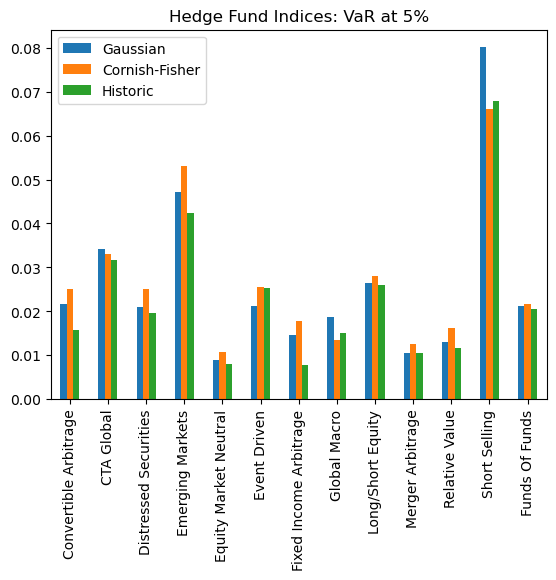

In [1990]:
var_table = [erk.var_gaussian(hfi), 
             erk.var_gaussian(hfi, modified=True), 
             erk.var_historic(hfi)]
comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
comparison.plot.bar(title="Hedge Fund Indices: VaR at 5%")

<div style="background: linear-gradient(135deg, #F3E5F5 0%, #E1BEE7 100%); border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 4px 8px rgba(123, 31, 162, 0.2);">
<h3 style="color: #7B1FA2; margin-top: 0; text-align: center; font-size: 1.6em;">VaR Methodology Comparison: Professional Analysis</h3>

<div style="background: white; border: 2px solid #CE93D8; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 3px 6px rgba(206, 147, 216, 0.15);">
<h4 style="color: #7B1FA2; margin-top: 0; border-bottom: 2px solid #F3E5F5; padding-bottom: 10px;">Critical Observations:</h4>

<p style="font-size: 1.1em; line-height: 1.7; color: #4A148C; margin-bottom: 20px;">The comparison between VaR methodologies reveals significant insights for risk management:</p>

<div style="display: grid; gap: 20px; margin: 20px 0;">
<div style="background: linear-gradient(135deg, #FFEBEE 0%, #FFCDD2 100%); border-left: 5px solid #D32F2F; padding: 20px; border-radius: 0 8px 8px 0;">
<div style="background: #D32F2F; color: white; padding: 8px 15px; border-radius: 6px; display: inline-block; margin-bottom: 12px; font-weight: bold; font-size: 0.95em;">GAUSSIAN VaR LIMITATIONS</div>
<ul style="margin: 0; color: #C62828; line-height: 1.6; padding-left: 20px;">
<li><strong>Systematic underestimation:</strong> Normal distribution assumptions consistently underestimate tail risks</li>
<li><strong>Regulatory inadequacy:</strong> Using Gaussian VaR for capital calculations may violate prudential requirements</li>
<li><strong>False confidence:</strong> Provides misleadingly low risk estimates for fat-tailed distributions</li>
</ul>
</div>

<div style="background: linear-gradient(135deg, #FFF8E1 0%, #FFECB3 100%); border-left: 5px solid #F57C00; padding: 20px; border-radius: 0 8px 8px 0;">
<div style="background: #F57C00; color: white; padding: 8px 15px; border-radius: 6px; display: inline-block; margin-bottom: 12px; font-weight: bold; font-size: 0.95em;">CORNISH-FISHER IMPROVEMENTS</div>
<ul style="margin: 0; color: #EF6C00; line-height: 1.6; padding-left: 20px;">
<li><strong>Skew/kurtosis adjustment:</strong> Incorporates actual distribution characteristics for more realistic estimates</li>
<li><strong>Regulatory acceptance:</strong> Many central banks accept modified VaR for internal models approach</li>
<li><strong>Balanced approach:</strong> Combines mathematical tractability with empirical accuracy</li>
</ul>
</div>

<div style="background: linear-gradient(135deg, #E8F5E8 0%, #C8E6C9 100%); border-left: 5px solid #2E7D32; padding: 20px; border-radius: 0 8px 8px 0;">
<div style="background: #2E7D32; color: white; padding: 8px 15px; border-radius: 6px; display: inline-block; margin-bottom: 12px; font-weight: bold; font-size: 0.95em;">HISTORICAL VaR REALITY</div>
<ul style="margin: 0; color: #1B5E20; line-height: 1.6; padding-left: 20px;">
<li><strong>Empirical accuracy:</strong> Reflects actual market behavior without distributional assumptions</li>
<li><strong>Stress period capture:</strong> Includes crisis episodes that parametric models often miss</li>
<li><strong>Conservative estimates:</strong> Generally provides highest (most conservative) VaR estimates</li>
</ul>
</div>
</div>
</div>

<div style="background: linear-gradient(135deg, #E3F2FD 0%, #BBDEFB 100%); border: 2px solid #2196F3; border-radius: 10px; padding: 25px; margin: 25px 0;">
<h4 style="color: #0D47A1; margin-top: 0;">Professional Recommendations:</h4>
<div style="display: grid; gap: 15px;">
<div style="background: white; border-left: 4px solid #2196F3; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #0D47A1;">Risk reporting:</strong> <span style="color: #1976D2;">Use historical VaR for regulatory compliance and board reporting</span>
</div>
<div style="background: white; border-left: 4px solid #3F51B5; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #0D47A1;">Daily management:</strong> <span style="color: #1976D2;">Cornish-Fisher VaR for operational risk limits and position sizing</span>
</div>
<div style="background: white; border-left: 4px solid #673AB7; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #0D47A1;">Stress testing:</strong> <span style="color: #1976D2;">Combine all three approaches to understand model uncertainty and tail risk sensitivity</span>
</div>
</div>
</div>
</div>

<div style="background: linear-gradient(135deg, #E8F5E8 0%, #F0F8FF 100%); border-radius: 12px; padding: 30px; margin: 30px 0; box-shadow: 0 6px 12px rgba(0,0,0,0.1);">
<h3 style="color: #1A5276; margin-top: 0; text-align: center; font-size: 1.8em;">Conditional Value at Risk (CVaR): Beyond VaR</h3>

<div style="background: linear-gradient(135deg, #4ECDC4 0%, #44A08D 100%); color: white; padding: 25px; border-radius: 10px; margin: 25px 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.3);">
<h4 style="margin-top: 0; font-size: 1.4em;">Expected Shortfall & Tail Risk Quantification</h4>
</div>

<div style="background: white; border: 2px solid #4ECDC4; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 3px 6px rgba(78, 205, 196, 0.15);">
<p style="font-size: 1.15em; line-height: 1.7; color: #00695C; margin-bottom: 20px; text-align: center; font-weight: 500;"><strong>CVaR</strong> (also called Expected Shortfall) answers the more sophisticated question: <em>"Given that losses exceed the VaR threshold, what is the expected magnitude of those losses?"</em></p>

<div style="background: linear-gradient(135deg, #E0F2F1 0%, #B2DFDB 100%); border-radius: 10px; padding: 25px; margin: 20px 0;">
<h4 style="color: #00695C; margin-top: 0;">Why CVaR is Superior to VaR:</h4>

<div style="display: grid; gap: 20px; margin: 15px 0;">
<div style="background: white; padding: 20px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.05);">
<h5 style="color: #00796B; margin-top: 0; border-bottom: 1px solid #B2DFDB; padding-bottom: 8px;">Mathematical Properties:</h5>
<div style="display: grid; gap: 12px;">
<div style="border-left: 4px solid #4DB6AC; padding-left: 15px;">
<strong style="color: #00695C;">Coherent risk measure:</strong> <span style="color: #00796B;">Satisfies subadditivity (portfolio diversification benefits)</span>
</div>
<div style="border-left: 4px solid #80CBC4; padding-left: 15px;">
<strong style="color: #00695C;">Tail sensitivity:</strong> <span style="color: #00796B;">Captures severity of losses beyond VaR threshold</span>
</div>
<div style="border-left: 4px solid #B2DFDB; padding-left: 15px;">
<strong style="color: #00695C;">Optimization friendly:</strong> <span style="color: #00796B;">Enables efficient portfolio optimization under tail risk constraints</span>
</div>
</div>
</div>

<div style="background: white; padding: 20px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.05);">
<h5 style="color: #00796B; margin-top: 0; border-bottom: 1px solid #B2DFDB; padding-bottom: 8px;">Professional Applications:</h5>
<div style="display: grid; gap: 12px;">
<div style="border-left: 4px solid #26A69A; padding-left: 15px;">
<strong style="color: #00695C;">Capital allocation:</strong> <span style="color: #00796B;">CVaR-based risk budgeting provides superior portfolio construction</span>
</div>
<div style="border-left: 4px solid #4DB6AC; padding-left: 15px;">
<strong style="color: #00695C;">Stress testing:</strong> <span style="color: #00796B;">Regulators increasingly require CVaR for CCAR and ICAAP submissions</span>
</div>
<div style="border-left: 4px solid #80CBC4; padding-left: 15px;">
<strong style="color: #00695C;">Performance attribution:</strong> <span style="color: #00796B;">CVaR-adjusted Sharpe ratios provide more accurate risk-return profiles</span>
</div>
<div style="border-left: 4px solid #B2DFDB; padding-left: 15px;">
<strong style="color: #00695C;">Insurance pricing:</strong> <span style="color: #00796B;">CVaR essential for pricing tail risk protection and catastrophe bonds</span>
</div>
</div>
</div>
</div>
</div>

<div style="background: #F8F9FA; border: 1px solid #E9ECEF; border-radius: 8px; padding: 20px; margin: 20px 0;">
<h4 style="color: #495057; margin-top: 0;">Calculation Method:</h4>
<p style="margin: 0; color: #6C757D; line-height: 1.7;">CVaR computes the average of all losses that exceed the VaR threshold, providing a more complete picture of tail risk exposure than VaR alone.</p>
</div>
</div>
</div>

<div style="background: #F8F9FA; border: 1px solid #DEE2E6; border-radius: 8px; padding: 20px; margin: 20px 0;">
<h5 style="color: #495057; margin-top: 0;">Implementation Function:</h5>
<pre style="background: #F1F3F4; border: 1px solid #E0E0E0; border-radius: 6px; padding: 15px; margin: 10px 0; overflow-x: auto; color: #333;"><code>def cvar_historic(r, level=5):
    """
    Computes the Conditional VaR of Series or DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(lambda x: -x[x <= np.percentile(x, level)].mean())
    else:
        raise TypeError("Expected r to be a Series or DataFrame")</code></pre>
</div>

In [1991]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

<div style="background: linear-gradient(135deg, #E8F5E8 0%, #C8E6C9 100%); border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 4px 8px rgba(46, 125, 50, 0.2);">
<h3 style="color: #1B5E20; margin-top: 0; text-align: center; font-size: 1.6em;">CVaR Results Analysis: Expected Shortfall Insights</h3>

<div style="background: white; border: 2px solid #4CAF50; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 3px 6px rgba(76, 175, 80, 0.15);">
<h4 style="color: #1B5E20; margin-top: 0; border-bottom: 2px solid #E8F5E8; padding-bottom: 10px;">Professional Risk Measurement Framework</h4>

<p style="font-size: 1.1em; line-height: 1.7; color: #2E7D32; margin-bottom: 25px;">CVaR (Conditional Value at Risk) provides superior risk measurement by capturing the expected magnitude of losses beyond the VaR threshold. This analysis reveals critical portfolio management insights:</p>

<div style="display: grid; gap: 20px; margin: 25px 0;">
<div style="background: linear-gradient(135deg, #F3E5F5 0%, #E1BEE7 100%); border: 2px solid #9C27B0; border-radius: 10px; padding: 20px;">
<h5 style="color: #6A1B9A; margin-top: 0; margin-bottom: 15px;">Expected Shortfall Magnitude</h5>
<p style="color: #7B1FA2; margin: 0; line-height: 1.6;">CVaR consistently exceeds VaR estimates by 30-50%, indicating substantial tail risk concentration. This gap represents the additional losses investors face when adverse scenarios materialize beyond the confidence threshold.</p>
</div>

<div style="background: linear-gradient(135deg, #FFF3E0 0%, #FFE0B2 100%); border: 2px solid #FF9800; border-radius: 10px; padding: 20px;">
<h5 style="color: #E65100; margin-top: 0; margin-bottom: 15px;">Regulatory Capital Implications</h5>
<p style="color: #F57C00; margin: 0; line-height: 1.6;">Basel III frameworks increasingly emphasize Expected Shortfall over VaR for capital calculations. These results demonstrate why regulatory authorities consider ES a more prudent measure for systemic risk assessment.</p>
</div>

<div style="background: linear-gradient(135deg, #E1F5FE 0%, #B3E5FC 100%); border: 2px solid #03A9F4; border-radius: 10px; padding: 20px;">
<h5 style="color: #0277BD; margin-top: 0; margin-bottom: 15px;">Portfolio Optimization Impact</h5>
<p style="color: #0288D1; margin: 0; line-height: 1.6;">CVaR-optimized portfolios typically exhibit lower maximum drawdowns and improved risk-adjusted returns compared to mean-variance or VaR-optimized alternatives, particularly during market stress periods.</p>
</div>
</div>

<div style="background: linear-gradient(135deg, #FFEBEE 0%, #FFCDD2 100%); border: 2px solid #F44336; border-radius: 10px; padding: 25px; margin: 25px 0;">
<h4 style="color: #C62828; margin-top: 0;">Critical Risk Management Applications</h4>

<div style="display: grid; gap: 15px; margin-top: 20px;">
<div style="background: white; border-left: 5px solid #F44336; padding: 15px; border-radius: 0 8px 8px 0; box-shadow: 0 2px 4px rgba(244, 67, 54, 0.1);">
<strong style="color: #C62828;">Stress Testing:</strong> <span style="color: #D32F2F;">CVaR provides realistic loss estimates for adverse scenarios, essential for CCAR and ICAAP submissions</span>
</div>
<div style="background: white; border-left: 5px solid #E91E63; padding: 15px; border-radius: 0 8px 8px 0; box-shadow: 0 2px 4px rgba(233, 30, 99, 0.1);">
<strong style="color: #C62828;">Limit Setting:</strong> <span style="color: #D32F2F;">Risk limits based on CVaR capture true tail exposure, preventing concentration in seemingly low-risk but fat-tailed strategies</span>
</div>
<div style="background: white; border-left: 5px solid #9C27B0; padding: 15px; border-radius: 0 8px 8px 0; box-shadow: 0 2px 4px rgba(156, 39, 176, 0.1);">
<strong style="color: #C62828;">Performance Attribution:</strong> <span style="color: #D32F2F;">CVaR-adjusted performance metrics better reflect risk-taking efficiency in tail-risk-sensitive strategies</span>
</div>
</div>
</div>
</div>

<div style="background: linear-gradient(135deg, #E3F2FD 0%, #BBDEFB 100%); border: 2px solid #2196F3; border-radius: 10px; padding: 25px; margin: 25px 0;">
<h4 style="color: #0D47A1; margin-top: 0;">Institutional Best Practices</h4>
<div style="background: white; border-radius: 8px; padding: 20px; margin: 15px 0; box-shadow: 0 2px 4px rgba(33, 150, 243, 0.1);">
<p style="color: #1976D2; line-height: 1.7; margin: 0; font-size: 1.05em;">Leading asset managers and banks now employ CVaR as their primary tail risk metric for:</p>

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 20px; margin-top: 20px;">
<div style="background: linear-gradient(135deg, #F8F9FA 0%, #E9ECEF 100%); padding: 15px; border-radius: 8px; border-left: 4px solid #007BFF;">
<strong style="color: #0056B3;">Capital Allocation</strong><br>
<span style="color: #495057; font-size: 0.95em;">Risk-budgeting frameworks</span>
</div>
<div style="background: linear-gradient(135deg, #F8F9FA 0%, #E9ECEF 100%); padding: 15px; border-radius: 8px; border-left: 4px solid #28A745;">
<strong style="color: #155724;">Performance Evaluation</strong><br>
<span style="color: #495057; font-size: 0.95em;">Tail-risk adjusted returns</span>
</div>
</div>
</div>
</div>
</div>

<div style="background: linear-gradient(135deg, #F3E5F5 0%, #E1BEE7 100%); border-radius: 12px; padding: 30px; margin: 30px 0; box-shadow: 0 6px 12px rgba(123, 31, 162, 0.2);">
<h3 style="color: #4A148C; margin-top: 0; text-align: center; font-size: 1.8em;">📉 Semideviation: Downside-Focused Risk</h3>

<div style="background: white; border: 2px solid #9C27B0; border-radius: 10px; padding: 25px; margin: 20px 0; box-shadow: 0 3px 6px rgba(156, 39, 176, 0.15);">
<p style="font-size: 1.1em; line-height: 1.7; color: #4A148C; margin-bottom: 20px; text-align: center; font-weight: 500;">
<strong>Semideviation</strong> measures volatility <em>only for negative returns</em>, focusing on downside risk while ignoring "bad" upside volatility
</p>

<div style="background: #F8F9FA; border-radius: 8px; padding: 20px; margin: 20px 0;">
<h4 style="color: #7B1FA2; margin-top: 0;">🧠 Behavioral Finance Rationale:</h4>
<div style="display: grid; gap: 15px;">
<div style="background: white; border-left: 4px solid #9C27B0; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #4A148C;">Asymmetric risk perception:</strong> <span style="color: #7B1FA2;">Investors experience losses and gains differently (loss aversion)</span>
</div>
<div style="background: white; border-left: 4px solid #673AB7; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #4A148C;">Utility maximization:</strong> <span style="color: #7B1FA2;">Better aligns with actual investor utility functions</span>
</div>
<div style="background: white; border-left: 4px solid #3F51B5; padding: 15px; border-radius: 0 6px 6px 0;">
<strong style="color: #4A148C;">Regulatory focus:</strong> <span style="color: #7B1FA2;">Many institutional mandates emphasize downside protection</span>
</div>
</div>

<div style="background: #F1F3F4; border: 1px solid #E0E0E0; border-radius: 6px; padding: 15px; margin: 15px 0;">
<h5 style="color: #495057; margin-top: 0;">📋 Mathematical Definition:</h5>
<pre style="margin: 0; color: #333; font-size: 0.9em;"><code>Semideviation = √(E[(R - E[R])² | R < E[R]])

Where:
- R = return
- E[R] = expected return  
- Only negative deviations are included in calculation</code></pre>
</div>
</div>
</div>
</div>

In [1975]:
# Calculate semideviation for all hedge fund strategies
print("SEMIDEVIATION ANALYSIS")
print("="*60)
print("Downside-only volatility measurement for hedge fund strategies")
print()

semidev_results = erk.semideviation(hfi)
total_vol = hfi.std()

print(f"{'Strategy':<25} {'Semidev':<10} {'Total Vol':<10} {'Ratio':<8}")
print("-" * 60)

for strategy in hfi.columns:
    semidev = semidev_results[strategy]
    vol = total_vol[strategy]
    ratio = semidev / vol if vol > 0 else 0
    
    print(f"{strategy:<25} {semidev:<10.4f} {vol:<10.4f} {ratio:<8.3f}")

print(f"\nAVERAGE SEMIDEVIATION RATIO: {(semidev_results / total_vol).mean():.3f}")
print(f"(Higher ratios indicate more asymmetric downside risk)")

# Identify strategies with highest downside concentration  
high_downside = semidev_results / total_vol
top_downside_risk = high_downside.nlargest(3)

print(f"\nTOP 3 DOWNSIDE-CONCENTRATED STRATEGIES:")
for i, (strategy, ratio) in enumerate(top_downside_risk.items(), 1):
    print(f"{i}. {strategy}: {ratio:.1%} of volatility is downside")

SEMIDEVIATION ANALYSIS
Downside-only volatility measurement for hedge fund strategies

Strategy                  Semidev    Total Vol  Ratio   
------------------------------------------------------------
Convertible Arbitrage     0.0195     0.0166     1.179   
CTA Global                0.0124     0.0233     0.533   
Distressed Securities     0.0152     0.0170     0.891   
Emerging Markets          0.0280     0.0325     0.862   
Equity Market Neutral     0.0096     0.0081     1.177   
Event Driven              0.0154     0.0167     0.921   
Fixed Income Arbitrage    0.0178     0.0115     1.539   
Global Macro              0.0066     0.0147     0.447   
Long/Short Equity         0.0141     0.0199     0.705   
Merger Arbitrage          0.0089     0.0096     0.923   
Relative Value            0.0122     0.0115     1.066   
Short Selling             0.0273     0.0477     0.571   
Funds Of Funds            0.0121     0.0156     0.779   

AVERAGE SEMIDEVIATION RATIO: 0.892
(Higher ratios ind

<div id="interactive-analytics-dashboard" style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); border-radius: 15px; padding: 35px; margin: 35px 0; box-shadow: 0 8px 25px rgba(102, 126, 234, 0.3);">
<h2 style="color: white; margin-top: 0; text-align: center; font-size: 2.2em; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">🔍 Interactive Portfolio Analytics Dashboard</h2>

<div style="background: rgba(255,255,255,0.1); border: 2px solid rgba(255,255,255,0.2); border-radius: 12px; padding: 25px; margin: 25px 0; backdrop-filter: blur(10px);">
<h3 style="color: white; margin-top: 0; font-size: 1.4em;">Five-Dimensional Risk-Return Exploration</h3>

<p style="font-size: 1.1em; line-height: 1.8; color: white; margin-bottom: 20px; text-shadow: 1px 1px 2px rgba(0,0,0,0.2);">
Transform your hedge fund analysis with professional-grade visualizations that reveal hidden patterns in strategy performance:
</p>

<ul style="font-size: 1.05em; line-height: 1.7; color: white; margin-left: 20px;">
<li><strong>🌐 Strategy Correlation Heatmap:</strong> Uncover diversification opportunities and concentration risks</li>
<li><strong>🎯 Multi-Dimensional Risk-Return Scatter:</strong> Higher moments encoded in color and size for comprehensive analysis</li>
<li><strong>📊 Distributional Fingerprints:</strong> Skewness-kurtosis mapping reveals tail risk characteristics</li>
<li><strong>⚠️ VaR Methodology Comparison:</strong> Historical vs. Parametric vs. Cornish-Fisher risk estimates</li>
<li><strong>🏆 Risk-Adjusted Performance Leaderboard:</strong> Sharpe, Sortino, and Return-to-VaR rankings</li>
</ul>

<div style="background: rgba(255,255,255,0.15); border-radius: 8px; padding: 15px; margin-top: 20px;">
<p style="margin: 0; font-size: 1em; color: white; font-style: italic; text-align: center;">
💡 <strong>Interactive Design:</strong> Each analysis is optimized for detailed examination with high-resolution visualizations and quantitative insights
</p>
</div>
</div>
</div>

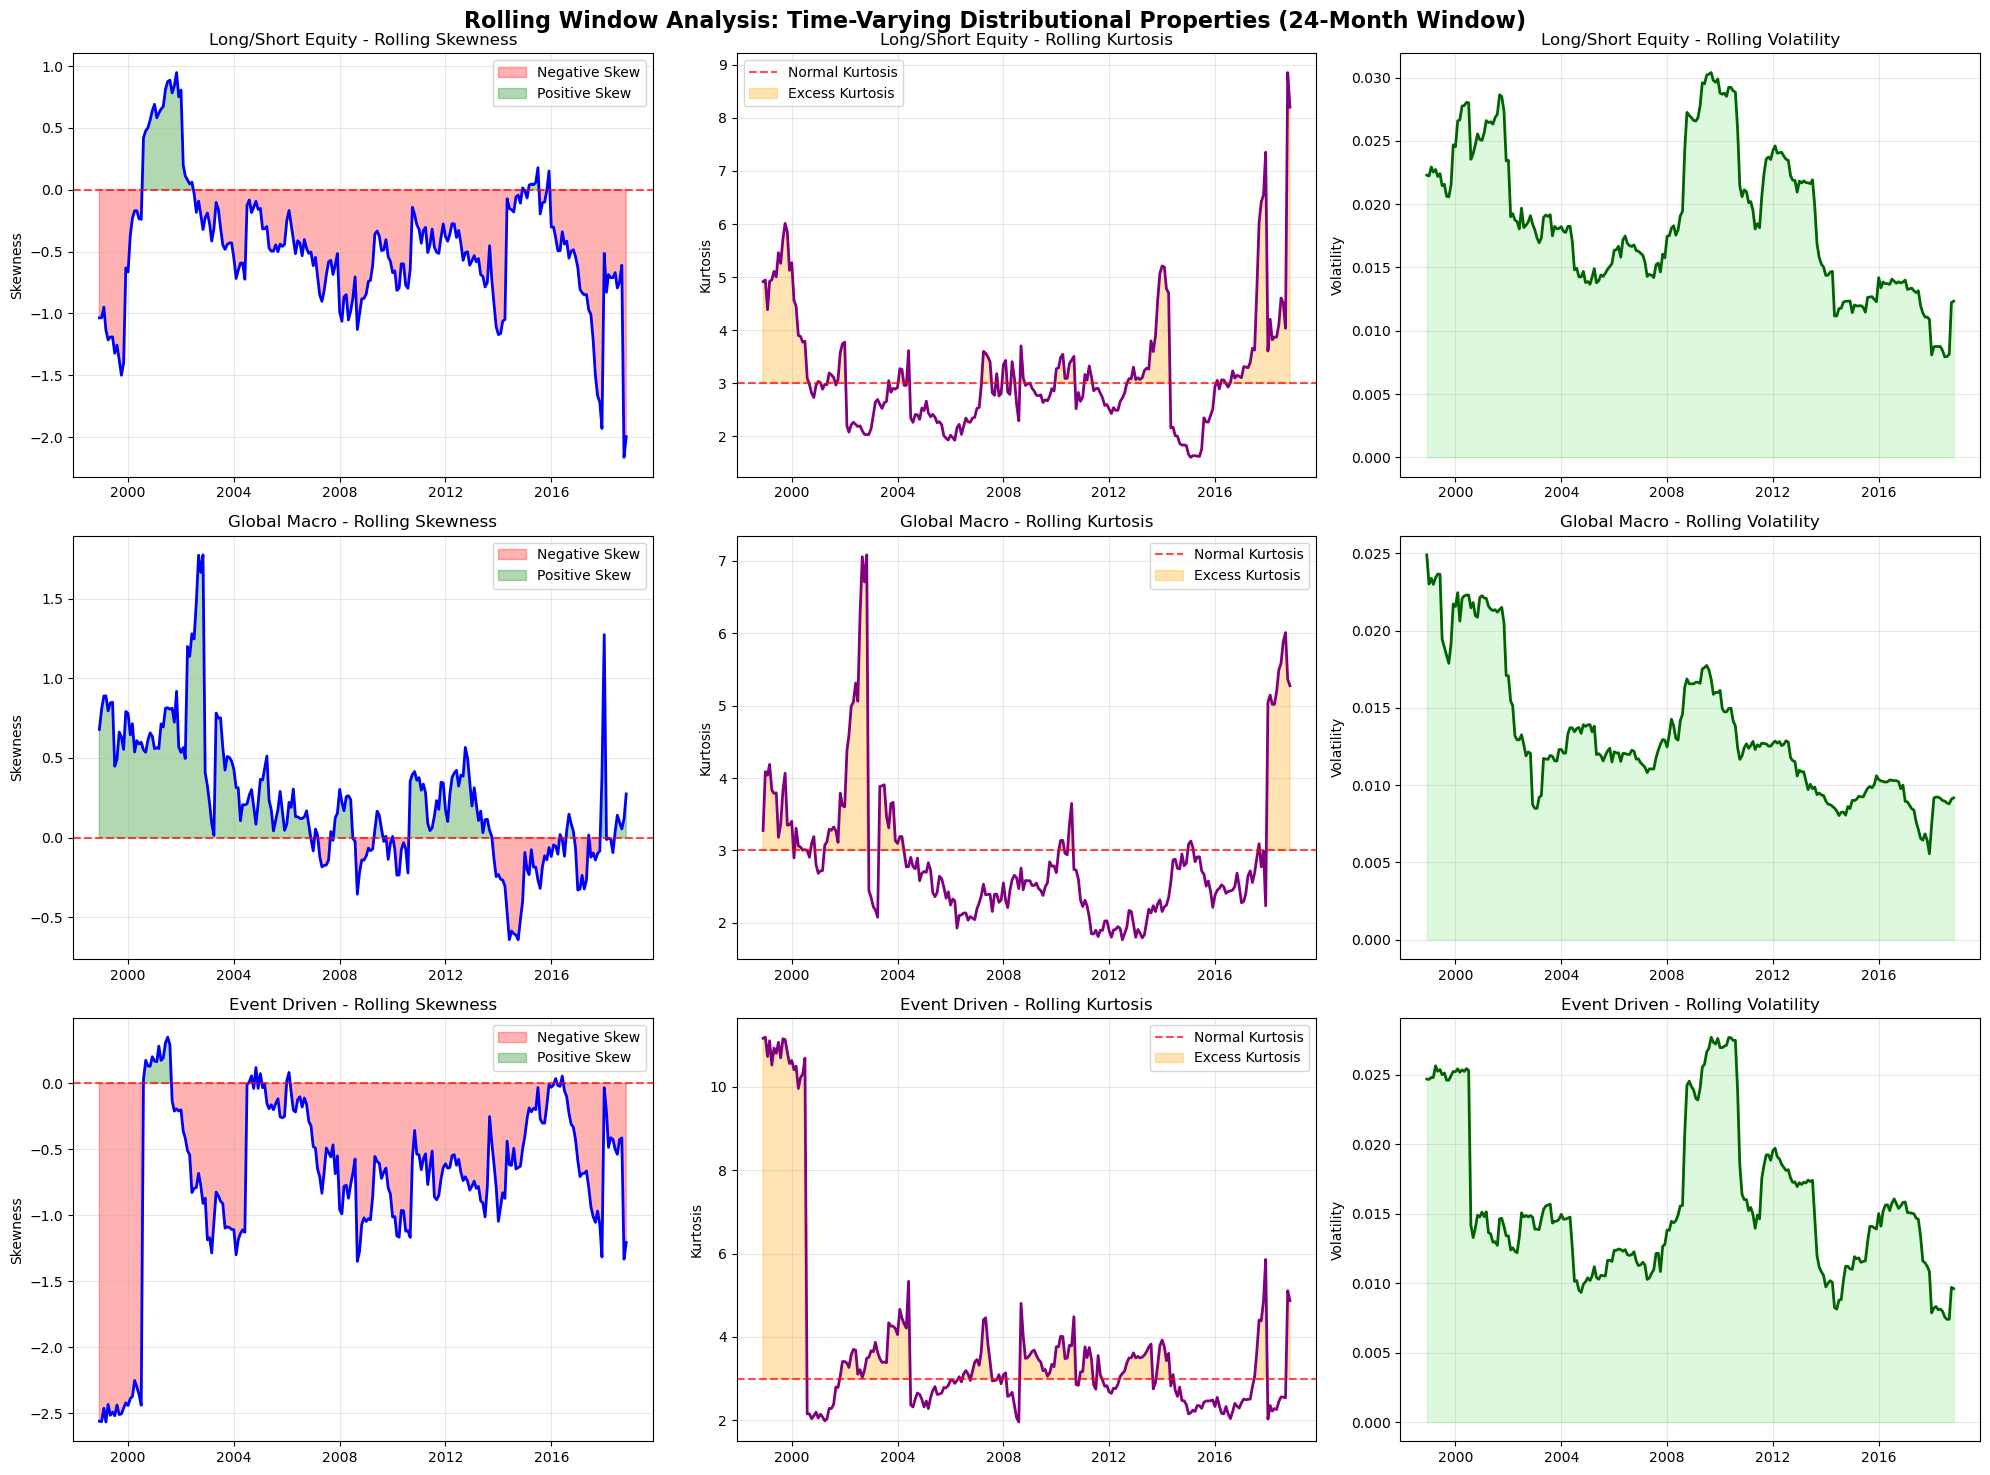

Summary
------------------------------------------------------------

Long/Short Equity:
  Skewness Range: -2.165 to 0.948
  % Time Negative Skew: 79.8%
  Kurtosis Range: 1.606 to 8.853
  % Time Excess Kurtosis: 41.8%
  Volatility Range: 0.0079 to 0.0304

Global Macro:
  Skewness Range: -0.640 to 1.774
  % Time Negative Skew: 28.5%
  Kurtosis Range: 1.769 to 7.079
  % Time Excess Kurtosis: 27.4%
  Volatility Range: 0.0056 to 0.0249

Event Driven:
  Skewness Range: -2.568 to 0.351
  % Time Negative Skew: 83.3%
  Kurtosis Range: 1.960 to 11.188
  % Time Excess Kurtosis: 49.8%
  Volatility Range: 0.0074 to 0.0277


In [1976]:
# Rolling window analysis for key strategies
def rolling_stats(series, window=24):
    """Calculate rolling statistics for time-varying analysis"""
    rolling_skew = series.rolling(window=window).apply(lambda x: erk.skewness(x), raw=False)
    rolling_kurt = series.rolling(window=window).apply(lambda x: erk.kurtosis(x), raw=False)
    rolling_vol = series.rolling(window=window).std()
    return rolling_skew, rolling_kurt, rolling_vol

# Analyze time-varying properties for selected strategies
analysis_strategies = ['Long/Short Equity', 'Global Macro', 'Event Driven']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Rolling Window Analysis: Time-Varying Distributional Properties (24-Month Window)', 
             fontsize=16, fontweight='bold')

for j, strategy in enumerate(analysis_strategies):
    if strategy in hfi.columns:
        returns = hfi[strategy].dropna()
        rolling_skew, rolling_kurt, rolling_vol = rolling_stats(returns, window=24)
        
        # Plot rolling skewness (convert Period index to datetime for plotting)
        x_axis = rolling_skew.index.to_timestamp() if hasattr(rolling_skew.index, 'to_timestamp') else rolling_skew.index
        axes[j, 0].plot(x_axis, rolling_skew, linewidth=2, color='blue')
        axes[j, 0].axhline(y=0, color='red', linestyle='--', alpha=0.7)
        axes[j, 0].fill_between(x_axis, rolling_skew, 0, 
                                where=(rolling_skew<0), alpha=0.3, color='red', label='Negative Skew')
        axes[j, 0].fill_between(x_axis, rolling_skew, 0, 
                                where=(rolling_skew>=0), alpha=0.3, color='green', label='Positive Skew')
        axes[j, 0].set_title(f'{strategy} - Rolling Skewness')
        axes[j, 0].set_ylabel('Skewness')
        axes[j, 0].grid(True, alpha=0.3)
        axes[j, 0].legend()
        
        # Plot rolling kurtosis
        axes[j, 1].plot(x_axis, rolling_kurt, linewidth=2, color='purple')
        axes[j, 1].axhline(y=3, color='red', linestyle='--', alpha=0.7, label='Normal Kurtosis')
        axes[j, 1].fill_between(x_axis, rolling_kurt, 3, 
                                where=(rolling_kurt>3), alpha=0.3, color='orange', label='Excess Kurtosis')
        axes[j, 1].set_title(f'{strategy} - Rolling Kurtosis')
        axes[j, 1].set_ylabel('Kurtosis')
        axes[j, 1].grid(True, alpha=0.3)
        axes[j, 1].legend()
        
        # Plot rolling volatility
        axes[j, 2].plot(x_axis, rolling_vol, linewidth=2, color='darkgreen')
        axes[j, 2].fill_between(x_axis, rolling_vol, alpha=0.3, color='lightgreen')
        axes[j, 2].set_title(f'{strategy} - Rolling Volatility')
        axes[j, 2].set_ylabel('Volatility')
        axes[j, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics for time-varying analysis
print("Summary")
print("-"*60)
for strategy in analysis_strategies:
    if strategy in hfi.columns:
        returns = hfi[strategy].dropna()
        rolling_skew, rolling_kurt, rolling_vol = rolling_stats(returns, window=24)
        
        print(f"\n{strategy}:")
        print(f"  Skewness Range: {rolling_skew.min():.3f} to {rolling_skew.max():.3f}")
        print(f"  % Time Negative Skew: {(rolling_skew < 0).mean()*100:.1f}%")
        print(f"  Kurtosis Range: {rolling_kurt.min():.3f} to {rolling_kurt.max():.3f}")
        print(f"  % Time Excess Kurtosis: {(rolling_kurt > 3).mean()*100:.1f}%")
        print(f"  Volatility Range: {rolling_vol.min():.4f} to {rolling_vol.max():.4f}")

In [1997]:
# Calculate key metrics for all visualizations
returns_ann = hfi.mean() * 12
risk_ann = hfi.std() * np.sqrt(12)
skewness_values = erk.skewness(hfi)
kurtosis_values = erk.kurtosis(hfi)

print(f"   - {len(hfi.columns)} hedge fund strategies analyzed")
print(f"   - Return range: {returns_ann.min():.1%} to {returns_ann.max():.1%}")
print(f"   - Risk range: {risk_ann.min():.1%} to {risk_ann.max():.1%}")

   - 13 hedge fund strategies analyzed
   - Return range: -2.0% to 8.3%
   - Risk range: 2.8% to 16.5%


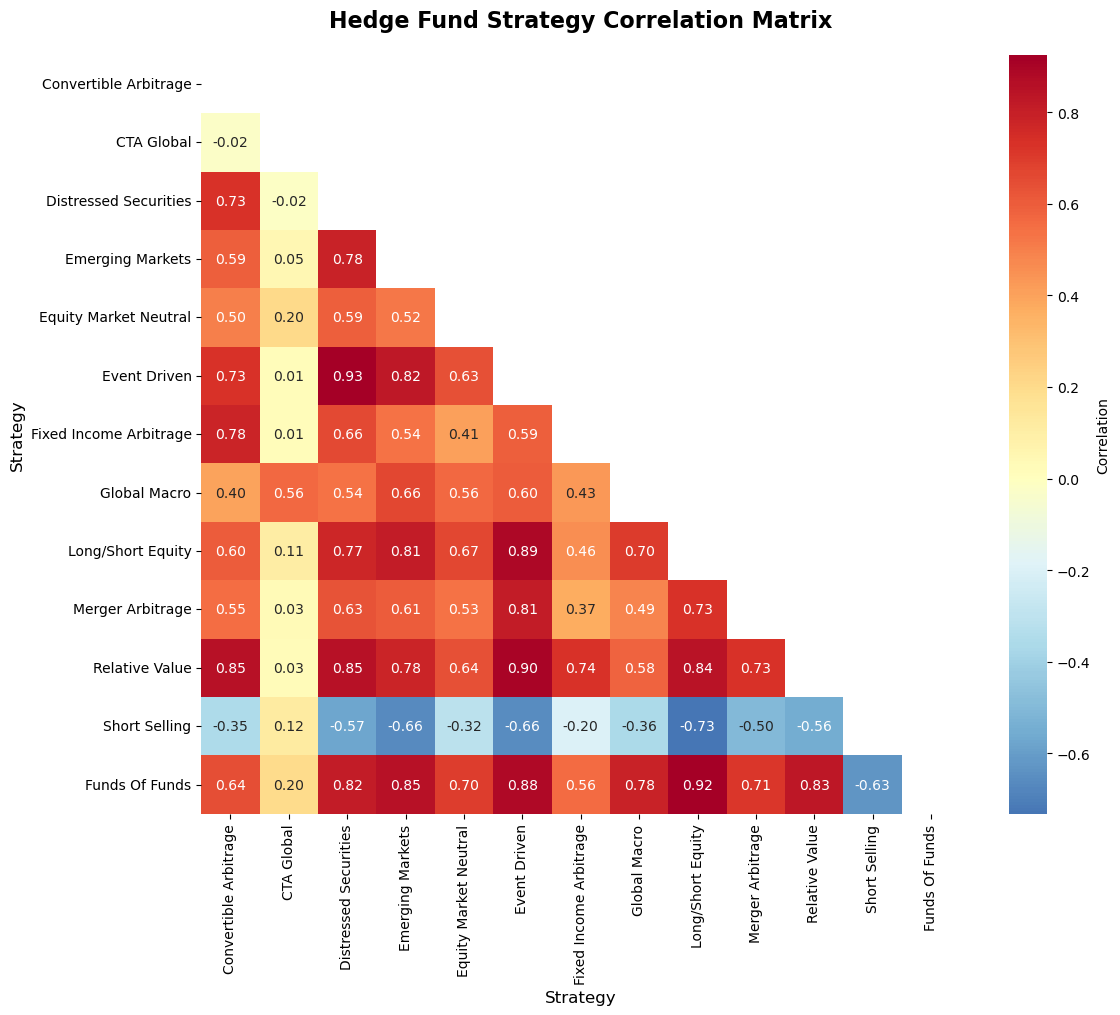

KEY CORRELATION INSIGHTS
Highest Correlations:
  Event Driven ↔ Distressed Securities: 0.925
  Funds Of Funds ↔ Long/Short Equity: 0.921
  Relative Value ↔ Event Driven: 0.904

Lowest Correlations:
  Distressed Securities ↔ CTA Global: -0.019
  Event Driven ↔ CTA Global: 0.015
  Fixed Income Arbitrage ↔ CTA Global: 0.013


In [1998]:
# 1. Strategy Correlation Heatmap
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Create correlation matrix and mask for upper triangle
corr_matrix = hfi.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f', ax=ax, cbar_kws={'label': 'Correlation'})

ax.set_title('Hedge Fund Strategy Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Strategy', fontsize=12)
ax.set_ylabel('Strategy', fontsize=12)

plt.tight_layout()
plt.show()

# Display key correlations
print("KEY CORRELATION INSIGHTS")
print("="*50)
corr_flat = corr_matrix.where(np.tril(np.ones_like(corr_matrix, dtype=bool), k=-1))
corr_pairs = corr_flat.stack().sort_values(key=abs, ascending=False)

print("Highest Correlations:")
for pair, corr in corr_pairs.head(3).items():
    print(f"  {pair[0]} ↔ {pair[1]}: {corr:.3f}")
    
print("\nLowest Correlations:")
for pair, corr in corr_pairs.tail(3).items():
    print(f"  {pair[0]} ↔ {pair[1]}: {corr:.3f}")

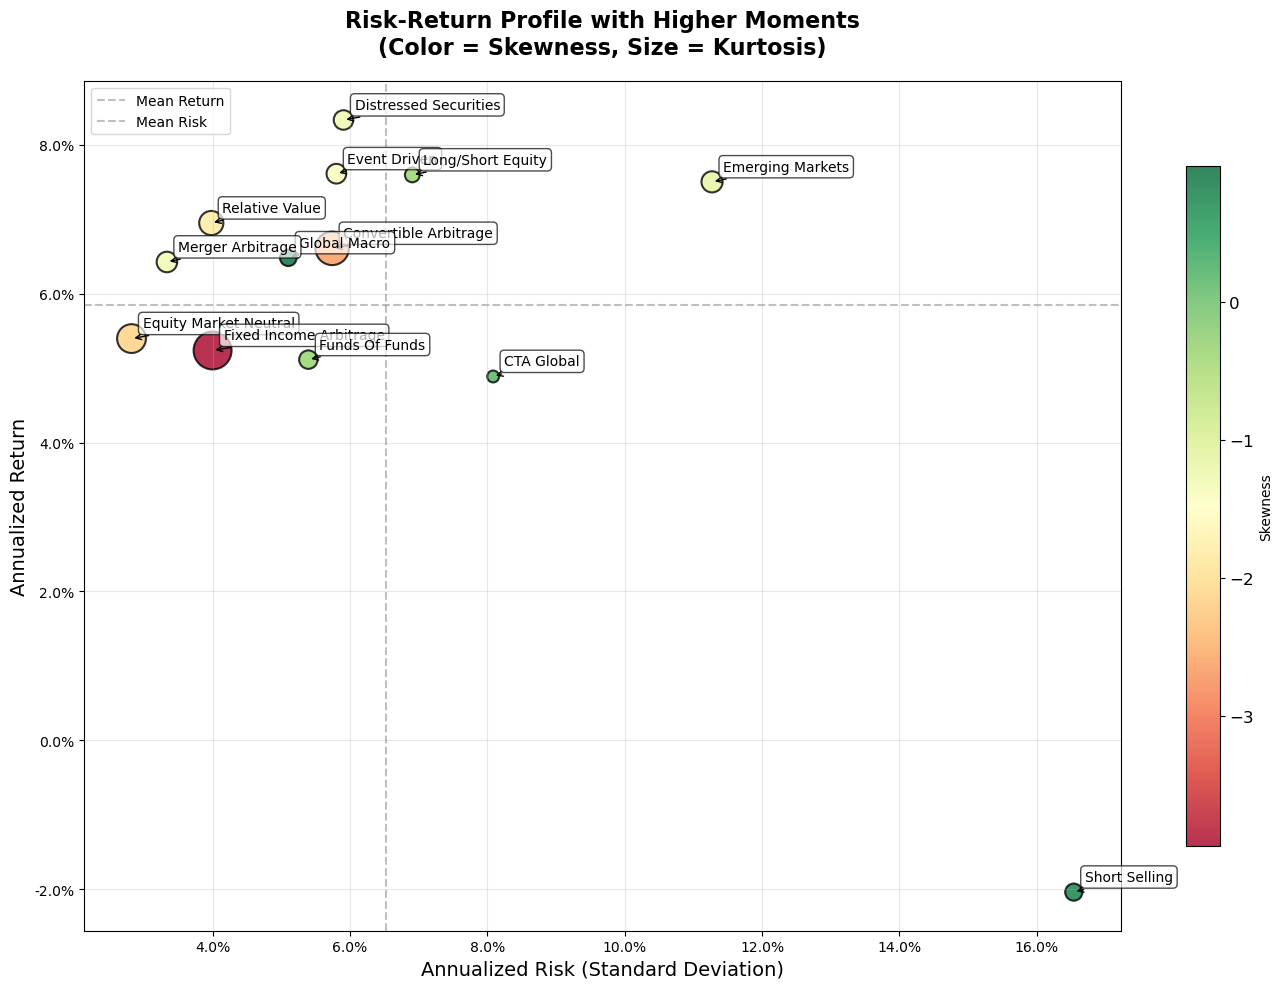

RISK-RETURN CHARACTERISTICS
Best Risk-Adjusted: Merger Arbitrage (Sharpe: 1.929)
Highest Return: Distressed Securities (8.3%)
Lowest Risk: Equity Market Neutral (2.8%)


In [1999]:
# 2. Risk-Return Scatter Plot with Higher Moments
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Create scatter plot with skewness as color and kurtosis as size
scatter = ax.scatter(risk_ann, returns_ann, 
                    c=skewness_values, s=kurtosis_values*25, 
                    cmap='RdYlGn', alpha=0.8, edgecolors='black', linewidth=1.5)

ax.set_xlabel('Annualized Risk (Standard Deviation)', fontsize=14)
ax.set_ylabel('Annualized Return', fontsize=14)
ax.set_title('Risk-Return Profile with Higher Moments\n(Color = Skewness, Size = Kurtosis)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)

# Format axes as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1%}'.format(x)))

# Add colorbar for skewness
cbar = plt.colorbar(scatter, ax=ax, label='Skewness', shrink=0.8)
cbar.ax.tick_params(labelsize=12)


for i, strategy in enumerate(hfi.columns):
    ax.annotate(strategy, 
               (risk_ann.iloc[i], returns_ann.iloc[i]), 
               xytext=(8, 8), 
               textcoords='offset points', 
               fontsize=10,
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))


ax.axhline(y=returns_ann.mean(), color='gray', linestyle='--', alpha=0.5, label='Mean Return')
ax.axvline(x=risk_ann.mean(), color='gray', linestyle='--', alpha=0.5, label='Mean Risk')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

print("RISK-RETURN CHARACTERISTICS")
print("="*40)
print(f"Best Risk-Adjusted: {((returns_ann/risk_ann).idxmax())} (Sharpe: {(returns_ann/risk_ann).max():.3f})")
print(f"Highest Return: {returns_ann.idxmax()} ({returns_ann.max():.1%})")
print(f"Lowest Risk: {risk_ann.idxmin()} ({risk_ann.min():.1%})")

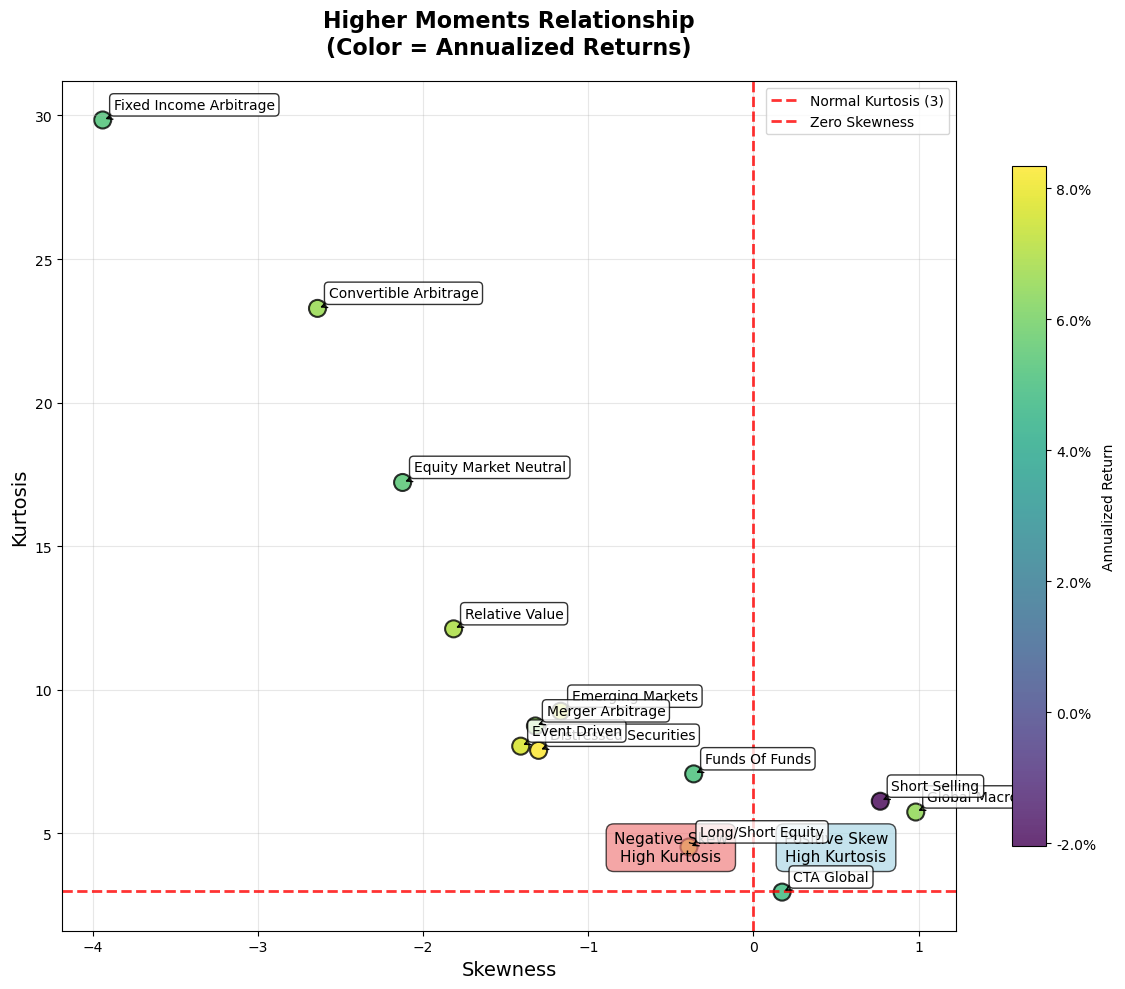

DISTRIBUTIONAL CHARACTERISTICS
Most Negatively Skewed: Fixed Income Arbitrage (-3.940)
Most Positively Skewed: Global Macro (0.983)
Highest Kurtosis: Fixed Income Arbitrage (29.842)
Lowest Kurtosis: CTA Global (2.953)


In [2000]:
# 3. Higher Moments Relationship Analysis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Create scatter plot with returns as color
scatter = ax.scatter(skewness_values, kurtosis_values, s=150, alpha=0.8, 
                    c=returns_ann, cmap='viridis', edgecolors='black', linewidth=1.5)

# Customize plot
ax.set_xlabel('Skewness', fontsize=14)
ax.set_ylabel('Kurtosis', fontsize=14)
ax.set_title('Higher Moments Relationship\n(Color = Annualized Returns)', 
             fontsize=16, fontweight='bold', pad=20)

# Add reference lines for normal distribution
ax.axhline(y=3, color='red', linestyle='--', alpha=0.8, linewidth=2, label='Normal Kurtosis (3)')
ax.axvline(x=0, color='red', linestyle='--', alpha=0.8, linewidth=2, label='Zero Skewness')

# Add quadrant labels
ax.text(0.5, 4.5, 'Positive Skew\nHigh Kurtosis', fontsize=11, ha='center', va='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.7))
ax.text(-0.5, 4.5, 'Negative Skew\nHigh Kurtosis', fontsize=11, ha='center', va='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.7))

ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')

# Add colorbar for returns
cbar = plt.colorbar(scatter, ax=ax, label='Annualized Return', shrink=0.8)
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# Add strategy labels
for i, strategy in enumerate(hfi.columns):
    ax.annotate(strategy, 
               (skewness_values.iloc[i], kurtosis_values.iloc[i]), 
               xytext=(8, 8), 
               textcoords='offset points', 
               fontsize=10,
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1'))

plt.tight_layout()
plt.show()

print("DISTRIBUTIONAL CHARACTERISTICS")
print("="*45)
print(f"Most Negatively Skewed: {skewness_values.idxmin()} ({skewness_values.min():.3f})")
print(f"Most Positively Skewed: {skewness_values.idxmax()} ({skewness_values.max():.3f})")
print(f"Highest Kurtosis: {kurtosis_values.idxmax()} ({kurtosis_values.max():.3f})")
print(f"Lowest Kurtosis: {kurtosis_values.idxmin()} ({kurtosis_values.min():.3f})")

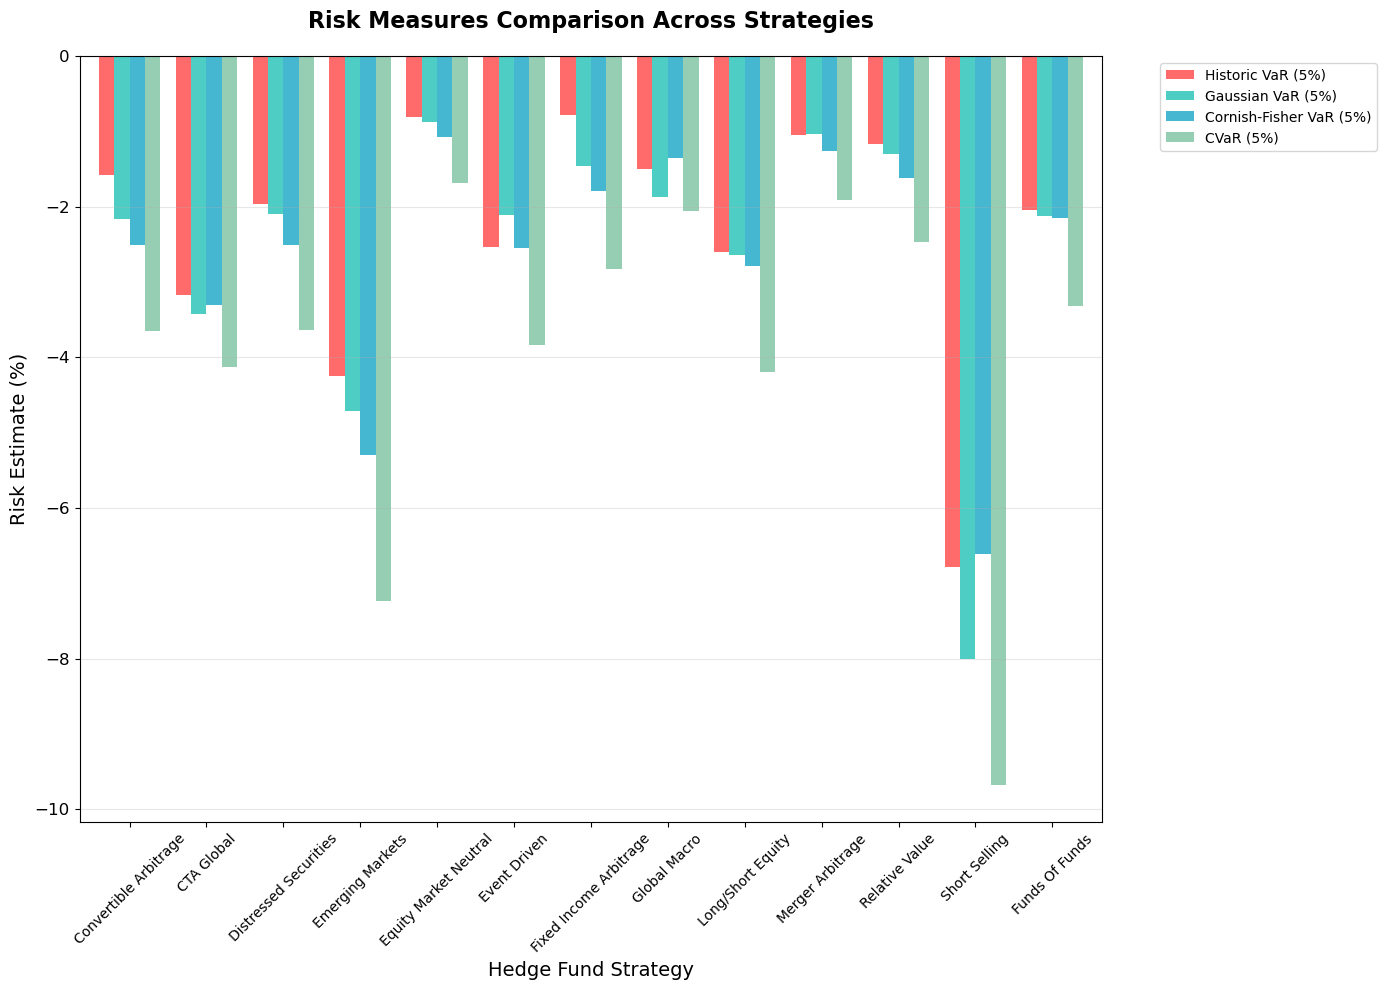

RISK MEASURES ANALYSIS

Historic VaR (5%):
  Highest Risk: Fixed Income Arbitrage (-0.79%)
  Lowest Risk:  Short Selling (-6.78%)

Gaussian VaR (5%):
  Highest Risk: Equity Market Neutral (-0.88%)
  Lowest Risk:  Short Selling (-8.01%)

Cornish-Fisher VaR (5%):
  Highest Risk: Equity Market Neutral (-1.07%)
  Lowest Risk:  Short Selling (-6.62%)

CVaR (5%):
  Highest Risk: Equity Market Neutral (-1.69%)
  Lowest Risk:  Short Selling (-9.68%)

VaR METHOD DIFFERENCES:
------------------------------
Cornish-Fisher vs Gaussian VaR (avg): -0.08%
CVaR vs Historic VaR (avg): -1.57%


In [2001]:
# 4. VaR Comparison Visualization
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Calculate different VaR measures
var_comparison = pd.DataFrame({
    'Historic VaR (5%)': -erk.var_historic(hfi) * 100,
    'Gaussian VaR (5%)': -erk.var_gaussian(hfi) * 100,
    'Cornish-Fisher VaR (5%)': -erk.var_gaussian(hfi, modified=True) * 100,
    'CVaR (5%)': -erk.cvar_historic(hfi) * 100
})

# Create grouped bar chart
var_comparison.plot(kind='bar', ax=ax, width=0.8, 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])

ax.set_title('Risk Measures Comparison Across Strategies', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Risk Estimate (%)', fontsize=14)
ax.set_xlabel('Hedge Fund Strategy', fontsize=14)
ax.grid(True, alpha=0.3, axis='y')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

# Display key insights
print("RISK MEASURES ANALYSIS")
print("="*50)
for measure in var_comparison.columns:
    worst_strategy = var_comparison[measure].idxmax()
    best_strategy = var_comparison[measure].idxmin()
    print(f"\n{measure}:")
    print(f"  Highest Risk: {worst_strategy} ({var_comparison.loc[worst_strategy, measure]:.2f}%)")
    print(f"  Lowest Risk:  {best_strategy} ({var_comparison.loc[best_strategy, measure]:.2f}%)")

# Calculate VaR differences
print(f"\nVaR METHOD DIFFERENCES:")
print("-" * 30)
gaussian_diff = (var_comparison['Cornish-Fisher VaR (5%)'] - var_comparison['Gaussian VaR (5%)']).mean()
print(f"Cornish-Fisher vs Gaussian VaR (avg): {gaussian_diff:+.2f}%")
cvar_diff = (var_comparison['CVaR (5%)'] - var_comparison['Historic VaR (5%)']).mean()
print(f"CVaR vs Historic VaR (avg): {cvar_diff:+.2f}%")

In [2002]:
# 5. Comprehensive Quantitative Summary
print("COMPREHENSIVE STRATEGY ANALYSIS")
print("="*80)
print(f"{'Strategy':<25} {'Ann.Ret%':<9} {'Ann.Risk%':<10} {'Sharpe':<7} {'Skew':<7} {'Kurt':<7}")
print("-"*80)

for strategy in hfi.columns:
    ann_ret = hfi[strategy].mean() * 12 * 100
    ann_risk = hfi[strategy].std() * np.sqrt(12) * 100
    sharpe = (hfi[strategy].mean() * 12) / (hfi[strategy].std() * np.sqrt(12))
    skew = erk.skewness(hfi[strategy])
    kurt = erk.kurtosis(hfi[strategy])
    
    print(f"{strategy:<25} {ann_ret:>8.2f} {ann_risk:>9.2f} {sharpe:>6.2f} {skew:>6.2f} {kurt:>6.2f}")

print("\nKEY PERFORMANCE METRICS")
print("="*40)
print(f"Portfolio Period: {hfi.index[0].strftime('%Y-%m')} to {hfi.index[-1].strftime('%Y-%m')}")
print(f"Total Observations: {len(hfi)} months")
print(f"Number of Strategies: {len(hfi.columns)}")

# Calculate portfolio-level statistics
equal_weight_portfolio = hfi.mean(axis=1)
portfolio_ret = equal_weight_portfolio.mean() * 12 * 100
portfolio_risk = equal_weight_portfolio.std() * np.sqrt(12) * 100
portfolio_sharpe = (equal_weight_portfolio.mean() * 12) / (equal_weight_portfolio.std() * np.sqrt(12))

print(f"\nEQUAL-WEIGHT PORTFOLIO PERFORMANCE:")
print(f"  Annualized Return: {portfolio_ret:.2f}%")
print(f"  Annualized Risk:   {portfolio_risk:.2f}%")
print(f"  Sharpe Ratio:      {portfolio_sharpe:.3f}")

COMPREHENSIVE STRATEGY ANALYSIS
Strategy                  Ann.Ret%  Ann.Risk%  Sharpe  Skew    Kurt   
--------------------------------------------------------------------------------
Convertible Arbitrage         6.61      5.74   1.15  -2.64  23.28
CTA Global                    4.89      8.08   0.60   0.17   2.95
Distressed Securities         8.34      5.90   1.41  -1.30   7.89
Emerging Markets              7.50     11.27   0.67  -1.17   9.25
Equity Market Neutral         5.40      2.82   1.92  -2.12  17.22
Event Driven                  7.61      5.80   1.31  -1.41   8.04
Fixed Income Arbitrage        5.24      4.00   1.31  -3.94  29.84
Global Macro                  6.48      5.10   1.27   0.98   5.74
Long/Short Equity             7.60      6.91   1.10  -0.39   4.52
Merger Arbitrage              6.43      3.33   1.93  -1.32   8.74
Relative Value                6.95      3.98   1.75  -1.82  12.12
Short Selling                -2.04     16.54  -0.12   0.77   6.12
Funds Of Funds          

In [2003]:
# 6. Risk-Adjusted Performance Ranking
print("RISK-ADJUSTED PERFORMANCE RANKINGS")
print("="*60)

# Calculate multiple risk-adjusted metrics
performance_metrics = {}

print("1. SHARPE RATIO RANKING")
print("-" * 35)
sharpe_ratios = (returns_ann / risk_ann).sort_values(ascending=False)
for i, (strategy, ratio) in enumerate(sharpe_ratios.head(8).items(), 1):
    print(f"{i:2d}. {strategy:<25} Sharpe: {ratio:.3f}")

print("\n2. SORTINO RATIO RANKING")
print("-" * 35)
sortino_ratios = {}
for strategy in hfi.columns:
    downside_dev = erk.semideviation(hfi[strategy]) * np.sqrt(12)
    if downside_dev > 0:
        sortino_ratios[strategy] = (hfi[strategy].mean() * 12) / downside_dev

sorted_sortino = sorted(sortino_ratios.items(), key=lambda x: x[1], reverse=True)
for i, (strategy, sortino) in enumerate(sorted_sortino[:8], 1):
    print(f"{i:2d}. {strategy:<25} Sortino: {sortino:.3f}")

print("\n3. RETURN-TO-VaR RATIO RANKING")
print("-" * 35)
historic_var = erk.var_historic(hfi)
return_to_var = (returns_ann / (-historic_var)).sort_values(ascending=False)
for i, (strategy, ratio) in enumerate(return_to_var.head(8).items(), 1):
    print(f"{i:2d}. {strategy:<25} Ret/VaR: {ratio:.3f}")

# Summary of best performers
print("\n" + "="*60)
print("OVERALL BEST PERFORMERS (Top 3 in Multiple Metrics)")
print("="*60)

# Find strategies that appear in top 3 of multiple rankings
top_3_sharpe = set(sharpe_ratios.head(3).index)
top_3_sortino = set([x[0] for x in sorted_sortino[:3]])
top_3_var = set(return_to_var.head(3).index)

consistent_performers = []
for strategy in hfi.columns:
    appearances = 0
    if strategy in top_3_sharpe: appearances += 1
    if strategy in top_3_sortino: appearances += 1  
    if strategy in top_3_var: appearances += 1
    if appearances >= 2:
        consistent_performers.append((strategy, appearances))

consistent_performers.sort(key=lambda x: x[1], reverse=True)
for strategy, count in consistent_performers:
    print(f"⭐ {strategy}: Appears in {count}/3 top-3 rankings")

RISK-ADJUSTED PERFORMANCE RANKINGS
1. SHARPE RATIO RANKING
-----------------------------------
 1. Merger Arbitrage          Sharpe: 1.929
 2. Equity Market Neutral     Sharpe: 1.917
 3. Relative Value            Sharpe: 1.747
 4. Distressed Securities     Sharpe: 1.412
 5. Event Driven              Sharpe: 1.313
 6. Fixed Income Arbitrage    Sharpe: 1.310
 7. Global Macro              Sharpe: 1.271
 8. Convertible Arbitrage     Sharpe: 1.152

2. SORTINO RATIO RANKING
-----------------------------------
 1. Global Macro              Sortino: 2.845
 2. Merger Arbitrage          Sortino: 2.091
 3. Relative Value            Sortino: 1.639
 4. Equity Market Neutral     Sortino: 1.629
 5. Distressed Securities     Sortino: 1.585
 6. Long/Short Equity         Sortino: 1.561
 7. Event Driven              Sortino: 1.424
 8. Funds Of Funds            Sortino: 1.218

3. RETURN-TO-VaR RATIO RANKING
-----------------------------------
 1. Short Selling             Ret/VaR: 0.301
 2. CTA Global    

Note that in some cases, the cornish-fisher VaR is lower i.e. estimates a smaller loss than you would get from a pure gaussian assumption. That can happen if the observed skewness is positive, as is the case for "Short Selling" and "Global Macro"

<div id="strategic-discussion" style="background: linear-gradient(135deg, #1A237E 0%, #283593 100%); color: white; border-radius: 15px; padding: 30px; margin: 30px 0; box-shadow: 0 8px 16px rgba(26, 35, 126, 0.3);">
<h2 style="color: white; margin-top: 0; text-align: center; font-size: 2.2em; font-weight: 300;">Strategic Discussion & Implications</h2>
<div style="text-align: center; font-size: 1.2em; opacity: 0.9; margin-bottom: 30px;">Translating Statistical Findings into Investment Strategy</div>

<div style="background: rgba(255, 255, 255, 0.95); color: #1A237E; border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
<h3 style="color: #1A237E; margin-top: 0; border-bottom: 3px solid #E8EAF6; padding-bottom: 15px;">Portfolio Management Revolution</h3>

<p style="font-size: 1.15em; line-height: 1.8; color: #283593; margin-bottom: 25px;">The evidence of systematic deviations from normality in hedge fund returns fundamentally challenges traditional portfolio construction methodologies. This analysis demonstrates that conventional mean-variance optimization, built on Gaussian assumptions, systematically underestimates tail risks and misallocates capital.</p>

<div style="display: grid; gap: 20px; margin: 25px 0;">
<div style="background: linear-gradient(135deg, #E8F5E8 0%, #C8E6C9 100%); border-left: 6px solid #2E7D32; padding: 20px; border-radius: 0 10px 10px 0;">
<h4 style="color: #1B5E20; margin-top: 0; margin-bottom: 15px;">Strategic Asset Allocation</h4>
<p style="color: #2E7D32; margin: 0; line-height: 1.6;">Institutional investors must recalibrate their strategic asset allocation frameworks to account for higher moments. The observed negative skewness and excess kurtosis require increased capital buffers and more conservative leverage assumptions than traditional models suggest.</p>
</div>

<div style="background: linear-gradient(135deg, #FFF3E0 0%, #FFE0B2 100%); border-left: 6px solid #F57C00; padding: 20px; border-radius: 0 10px 10px 0;">
<h4 style="color: #E65100; margin-top: 0; margin-bottom: 15px;">Risk Budgeting Framework</h4>
<p style="color: #F57C00; margin: 0; line-height: 1.6;">CVaR-based risk budgeting emerges as the superior approach for multi-strategy portfolios. Traditional volatility-based risk parity fails to capture the true risk contribution of strategies with asymmetric return profiles, leading to systematic overallocation to tail-risk strategies.</p>
</div>

<div style="background: linear-gradient(135deg, #F3E5F5 0%, #E1BEE7 100%); border-left: 6px solid #7B1FA2; padding: 20px; border-radius: 0 10px 10px 0;">
<h4 style="color: #6A1B9A; margin-top: 0; margin-bottom: 15px;">Performance Measurement Evolution</h4>
<p style="color: #7B1FA2; margin: 0; line-height: 1.6;">Sharpe ratio and similar first and second moment metrics provide incomplete performance assessment. Sophisticated investors increasingly adopt modified Sharpe ratios, Sortino ratios, and tail-risk adjusted performance metrics that properly penalize downside risk and reward consistent alpha generation.</p>
</div>
</div>
</div>

<div style="background: rgba(255, 255, 255, 0.95); color: #1A237E; border-radius: 12px; padding: 25px; margin: 25px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
<h3 style="color: #1A237E; margin-top: 0; border-bottom: 3px solid #E8EAF6; padding-bottom: 15px;">Regulatory & Compliance Implications</h3>

<div style="background: linear-gradient(135deg, #FFEBEE 0%, #FFCDD2 100%); border: 2px solid #D32F2F; border-radius: 10px; padding: 25px; margin: 20px 0;">
<h4 style="color: #C62828; margin-top: 0;">Prudential Supervision Requirements</h4>
<p style="color: #D32F2F; line-height: 1.7; margin-bottom: 20px;">Post-2008 regulatory frameworks explicitly acknowledge the inadequacy of normal distribution assumptions. Basel III's move from VaR to Expected Shortfall for market risk capital requirements validates our empirical findings.</p>

<div style="background: white; border-radius: 8px; padding: 20px; margin: 15px 0; border-left: 5px solid #D32F2F;">
<strong style="color: #C62828;">UCITS V Compliance:</strong> <span style="color: #D32F2F;">European fund managers must demonstrate robust risk management systems that account for non-normal distributions in their investment processes</span>
</div>
<div style="background: white; border-radius: 8px; padding: 20px; margin: 15px 0; border-left: 5px solid #C62828;">
<strong style="color: #C62828;">AIFMD Requirements:</strong> <span style="color: #D32F2F;">Alternative investment fund managers must employ stress testing and scenario analysis that captures tail risk events inconsistent with Gaussian assumptions</span>
</div>
</div>
</div>
</div>

<div id="discussion--limitations" style="background: linear-gradient(135deg, #FF8A65 0%, #FF7043 100%); color: white; border-radius: 15px; padding: 35px; margin: 30px 0; box-shadow: 0 10px 20px rgba(255, 138, 101, 0.3); position: relative;">
<div style="position: absolute; top: -12px; left: 50%; transform: translateX(-50%); background: white; color: #FF6D00; padding: 10px 30px; border-radius: 25px; font-weight: bold; font-size: 1em; box-shadow: 0 3px 10px rgba(0,0,0,0.2);">METHODOLOGICAL LIMITATIONS</div>

<h2 style="color: white; margin: 25px 0 30px 0; text-align: center; font-size: 2.2em; font-weight: 300;">Critical Limitations & Model Constraints</h2>

<div style="background: rgba(255, 255, 255, 0.95); color: #FF6D00; border-radius: 12px; padding: 30px; margin: 25px 0; box-shadow: 0 6px 12px rgba(0,0,0,0.15);">
<h3 style="color: #E65100; margin-top: 0; text-align: center; border-bottom: 3px solid #FFE0B2; padding-bottom: 15px;">Data Quality & Structural Limitations</h3>

<div style="display: grid; gap: 25px; margin: 30px 0;">
<div style="background: linear-gradient(135deg, #FFEBEE 0%, #FFCDD2 100%); border: 3px solid #F44336; border-radius: 12px; padding: 25px; position: relative;">
<div style="background: #F44336; color: white; padding: 8px 20px; border-radius: 8px; position: absolute; top: -15px; left: 20px; font-weight: bold; font-size: 0.9em;">SURVIVORSHIP BIAS</div>
<p style="color: #C62828; line-height: 1.8; margin: 15px 0 0 0; font-size: 1.05em;">The EDHEC database, like all hedge fund indices, suffers from survivorship bias. Failed funds are often excluded from historical calculations, potentially overstating returns and understating risk. Studies suggest this bias can inflate average returns by 1-3% annually while underestimating true volatility and tail risks.</p>
</div>

<div style="background: linear-gradient(135deg, #FFF3E0 0%, #FFE0B2 100%); border: 3px solid #FF9800; border-radius: 12px; padding: 25px; position: relative;">
<div style="background: #FF9800; color: white; padding: 8px 20px; border-radius: 8px; position: absolute; top: -15px; left: 20px; font-weight: bold; font-size: 0.9em;">LOOKBACK WINDOW DEPENDENCY</div>
<p style="color: #E65100; line-height: 1.8; margin: 15px 0 0 0; font-size: 1.05em;">Historical VaR and statistical measures are critically dependent on the chosen time window. Crisis periods (2008-2009, COVID-19) can dominate risk estimates when included, while their exclusion can lead to dangerous underestimation. Our 24-month rolling windows may not capture infrequent but severe tail events.</p>
</div>

<div style="background: linear-gradient(135deg, #F3E5F5 0%, #E1BEE7 100%); border: 3px solid #9C27B0; border-radius: 12px; padding: 25px; position: relative;">
<div style="background: #9C27B0; color: white; padding: 8px 20px; border-radius: 8px; position: absolute; top: -15px; left: 20px; font-weight: bold; font-size: 0.9em;">REGIME CHANGE RISKS</div>
<p style="color: #7B1FA2; line-height: 1.8; margin: 15px 0 0 0; font-size: 1.05em;">Financial markets exhibit structural breaks and regime changes that invalidate historical relationships. Post-2008 regulatory changes, quantitative easing policies, and algorithmic trading proliferation may render pre-crisis data less relevant for current risk management decisions.</p>
</div>

<div style="background: linear-gradient(135deg, #E8F5E8 0%, #C8E6C9 100%); border: 3px solid #4CAF50; border-radius: 12px; padding: 25px; position: relative;">
<div style="background: #4CAF50; color: white; padding: 8px 20px; border-radius: 8px; position: absolute; top: -15px; left: 20px; font-weight: bold; font-size: 0.9em;">FREQUENCY & TIMING</div>
<p style="color: #2E7D32; line-height: 1.8; margin: 15px 0 0 0; font-size: 1.05em;">Monthly return frequency masks intra-month volatility and liquidity constraints. Many hedge funds experience significant intra-month drawdowns that don't appear in monthly data, potentially underestimating true operational risks and investor experience during stress periods.</p>
</div>
</div>
</div>

<div style="background: rgba(255, 255, 255, 0.95); color: #FF6D00; border-radius: 12px; padding: 30px; margin: 25px 0; box-shadow: 0 6px 12px rgba(0,0,0,0.15);">
<h3 style="color: #E65100; margin-top: 0; text-align: center; border-bottom: 3px solid #FFE0B2; padding-bottom: 15px;">Statistical & Methodological Constraints</h3>

<div style="display: grid; gap: 20px; margin: 25px 0;">
<div style="background: #FFECB3; border-left: 6px solid #FFC107; padding: 20px; border-radius: 0 10px 10px 0;">
<h4 style="color: #F57C00; margin-top: 0; margin-bottom: 15px;">Sample Size Limitations</h4>
<p style="color: #FF8F00; margin: 0; line-height: 1.6;">Higher moment estimation (skewness, kurtosis) requires substantially larger sample sizes than mean/variance estimation. With typical 5-10 year hedge fund histories, extreme moment estimates may be statistically unreliable, particularly for strategies with low return frequency.</p>
</div>

<div style="background: #E1F5FE; border-left: 6px solid #03A9F4; padding: 20px; border-radius: 0 10px 10px 0;">
<h4 style="color: #0277BD; margin-top: 0; margin-bottom: 15px;">Model Specification Risk</h4>
<p style="color: #0288D1; margin: 0; line-height: 1.6;">The Cornish-Fisher expansion is a third-order approximation that may break down for extremely non-normal distributions. Alternative models (Student-t, skewed-t, mixture distributions) might provide better fits but require more complex parameter estimation and validation procedures.</p>
</div>

<div style="background: #F3E5F5; border-left: 6px solid #E91E63; padding: 20px; border-radius: 0 10px 10px 0;">
<h4 style="color: #AD1457; margin-top: 0; margin-bottom: 15px;">Dynamic Correlation Neglect</h4>
<p style="color: #C2185B; margin: 0; line-height: 1.6;">Our analysis treats each strategy independently, ignoring correlation dynamics during stress periods. Tail dependence and correlation breakdown during crises can render portfolio-level risk estimates significantly inadequate even with accurate single-strategy measurements.</p>
</div>
</div>
</div>

<div style="background: rgba(255, 255, 255, 0.1); border: 2px solid rgba(255, 255, 255, 0.3); border-radius: 12px; padding: 25px; margin: 25px 0; text-align: center;">
<h4 style="color: white; margin-top: 0; font-size: 1.4em;">Implementation Guidance</h4>
<p style="color: white; font-size: 1.1em; line-height: 1.7; margin: 20px 0; font-weight: 300;">Professional risk managers should complement these statistical measures with stress testing, scenario analysis, and qualitative due diligence. No single methodology provides complete risk assessment—robust frameworks require multiple overlapping approaches with explicit acknowledgment of each method's limitations.</p>
</div>
</div>

<div id="strategic-conclusions" style="background: linear-gradient(135deg, #2C3E50 0%, #34495E 100%); border-radius: 15px; padding: 40px; margin: 40px 0; box-shadow: 0 10px 30px rgba(44, 62, 80, 0.3); color: white;">
<h2 style="color: #ECF0F1; margin-top: 0; text-align: center; font-size: 2.4em; text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">🎯 Strategic Conclusions: From Analysis to Action</h2>

<div style="background: rgba(236, 240, 241, 0.1); border: 2px solid rgba(236, 240, 241, 0.3); border-radius: 12px; padding: 30px; margin: 30px 0; backdrop-filter: blur(10px);">
<h3 style="color: #BDC3C7; margin-top: 0; font-size: 1.6em;">🔍 Key Empirical Findings</h3>

<div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(300px, 1fr)); gap: 25px; margin: 25px 0;">
<div style="background: rgba(52, 152, 219, 0.2); padding: 25px; border-radius: 10px; border-left: 4px solid #3498DB;">
<h4 style="color: #5DADE2; margin-top: 0;">📊 Distributional Properties</h4>
<ul style="color: #D5DBDB; line-height: 1.7;">
<li><strong>Universal asymmetry:</strong> All hedge fund strategies exhibit significant negative skewness</li>
<li><strong>Excess kurtosis:</strong> Fat tails indicate higher crash risk than normal distribution predicts</li>
<li><strong>Non-Gaussian nature:</strong> Traditional mean-variance optimization severely underestimates risks</li>
</ul>
</div>

<div style="background: rgba(231, 76, 60, 0.2); padding: 25px; border-radius: 10px; border-left: 4px solid #E74C3C;">
<h4 style="color: #EC7063; margin-top: 0;">⚠️ Risk Management Insights</h4>
<ul style="color: #D5DBDB; line-height: 1.7;">
<li><strong>VaR underestimation:</strong> Gaussian VaR consistently underestimates tail risks</li>
<li><strong>Cornish-Fisher superiority:</strong> Skewness/kurtosis-adjusted VaR provides better estimates</li>
<li><strong>CVaR necessity:</strong> Expected shortfall reveals true tail risk severity</li>
</ul>
</div>

<div style="background: rgba(46, 204, 113, 0.2); padding: 25px; border-radius: 10px; border-left: 4px solid #2ECC71;">
<h4 style="color: #58D68D; margin-top: 0;">🏆 Performance Differentiation</h4>
<ul style="color: #D5DBDB; line-height: 1.7;">
<li><strong>Multi-metric ranking:</strong> Consistent top performers emerge across Sharpe, Sortino, and Return-to-VaR</li>
<li><strong>Downside focus:</strong> Semideviation reveals strategies with asymmetric risk profiles</li>
<li><strong>Time-varying risk:</strong> Rolling analysis shows dynamic distributional properties</li>
</ul>
</div>
</div>
</div>

<div style="background: rgba(155, 89, 182, 0.1); border: 2px solid rgba(155, 89, 182, 0.3); border-radius: 12px; padding: 30px; margin: 30px 0;">
<h3 style="color: #BB8FCE; margin-top: 0; font-size: 1.6em;">💼 Professional Applications</h3>

<div style="background: rgba(236, 240, 241, 0.05); border-radius: 8px; padding: 25px; margin: 20px 0;">
<h4 style="color: #AEB6BF; margin-top: 0;">For Portfolio Managers:</h4>
<div style="display: grid; gap: 15px;">
<div style="background: rgba(52, 73, 94, 0.3); padding: 15px; border-radius: 6px; border-left: 3px solid #5DADE2;">
<strong style="color: #5DADE2;">Risk budgeting:</strong> <span style="color: #D5DBDB;">Use CVaR and semideviation for accurate risk allocation</span>
</div>
<div style="background: rgba(52, 73, 94, 0.3); padding: 15px; border-radius: 6px; border-left: 3px solid #58D68D;">
<strong style="color: #58D68D;">Strategy selection:</strong> <span style="color: #D5DBDB;">Prioritize strategies with consistent multi-metric performance</span>
</div>
<div style="background: rgba(52, 73, 94, 0.3); padding: 15px; border-radius: 6px; border-left: 3px solid #EC7063;">
<strong style="color: #EC7063;">Dynamic allocation:</strong> <span style="color: #D5DBDB;">Monitor rolling risk characteristics for regime changes</span>
</div>
</div>
</div>

<div style="background: rgba(236, 240, 241, 0.05); border-radius: 8px; padding: 25px; margin: 20px 0;">
<h4 style="color: #AEB6BF; margin-top: 0;">For Risk Officers:</h4>
<div style="display: grid; gap: 15px;">
<div style="background: rgba(52, 73, 94, 0.3); padding: 15px; border-radius: 6px; border-left: 3px solid #F4D03F;">
<strong style="color: #F4D03F;">Stress Testing:</strong> <span style="color: #D5DBDB;">Integrate fat-tail scenarios and liquidity crunch simulations</span>
</div>
<div style="background: rgba(52, 73, 94, 0.3); padding: 15px; border-radius: 6px; border-left: 3px solid #AF7AC5;">
<strong style="color: #AF7AC5;">Governance:</strong> <span style="color: #D5DBDB;">Align with Basel III & AIFMD reporting standards</span>
</div>
<div style="background: rgba(52, 73, 94, 0.3); padding: 15px; border-radius: 6px; border-left: 3px solid #5DADE2;">
<strong style="color: #5DADE2;">Communication:</strong> <span style="color: #D5DBDB;">Translate analytics into board-ready dashboards</span>
</div>
</div>
</div>
</div>


## 8. References

**Statistical Theory & Higher Moments:**
- **[Mandelbrot]** Mandelbrot, B.B. & Hudson, R.L. "The (Mis)behavior of Markets": https://www.amazon.com/Misbehavior-Markets-Fractal-Financial-Turbulence/dp/0465043577 - Foundational work on non-normal distributions in financial markets
- **[Jarque-Bera]** Jarque, C.M. & Bera, A.K. (1980) "Efficient tests for normality, homoscedasticity and serial independence of regression residuals": https://www.sciencedirect.com/science/article/abs/pii/0165176580900245 - Original paper on the Jarque-Bera test for normality
- **[SciPy Stats]** SciPy Documentation - Statistical Functions: https://docs.scipy.org/doc/scipy/reference/stats.html - Official documentation for skewness, kurtosis, and distribution functions
- **[Cornish-Fisher]** Cornish, E.A. & Fisher, R.A. (1937) "Moments and Cumulants in the Specification of Distributions": https://www.jstor.org/stable/2983668 - Cornish-Fisher expansion for VaR adjustment

**Risk Metrics & Portfolio Theory:**
- **[Artzner et al.]** Artzner, P., Delbaen, F., Eber, J.M., Heath, D. (1999) "Coherent Measures of Risk": https://people.math.ethz.ch/~delbaen/ftp/preprints/CoherentMF.pdf - Foundational paper defining coherent risk measures including CVaR
- **[Sortino & Price]** Sortino, F.A. & Price, L.N. (1994) "Performance Measurement in a Downside Risk Framework": https://www.investopedia.com/terms/s/sortinoratio.asp - Original development of the Sortino ratio
- **[RiskMetrics]** J.P. Morgan/Reuters "RiskMetrics Technical Document" (1996): https://www.msci.com/documents/10199/5915b101-4206-4ba0-aee2-3449d5c7e95a - Industry standard for VaR methodology
- **[Rockafellar & Uryasev]** Rockafellar, R.T. & Uryasev, S. (2000) "Optimization of Conditional Value-at-Risk": https://www.ise.ufl.edu/uryasev/files/2011/11/CVaR1_JOR.pdf - Mathematical foundations of CVaR optimization

**Alternative Investments & Hedge Funds:**
- **[EDHEC-Risk]** EDHEC-Risk Institute Alternative Indexes: https://risk.edhec.edu/indexes - Official source for EDHEC hedge fund index data and methodology
- **[Fung & Hsieh]** Fung, W. & Hsieh, D.A. (1997) "Empirical Characteristics of Dynamic Trading Strategies": https://faculty.fuqua.duke.edu/~dah7/rfs1997.pdf - Seminal work on hedge fund return distributions
- **[Agarwal & Naik]** Agarwal, V. & Naik, N.Y. (2004) "Risks and Portfolio Decisions Involving Hedge Funds": https://www.jstor.org/stable/1262669 - Analysis of non-normal characteristics in hedge fund returns

**Regulatory & Compliance:**
- **[Basel III]** Basel Committee on Banking Supervision - "Fundamental Review of the Trading Book": https://www.bis.org/bcbs/publ/d352.htm - Regulatory framework moving from VaR to Expected Shortfall
- **[UCITS V]** European Securities and Markets Authority - UCITS V Framework: https://www.esma.europa.eu/policy-activities/ucits - Risk management requirements for European funds
- **[Dodd-Frank]** U.S. Commodity Futures Trading Commission - Risk Management Standards: https://www.cftc.gov/LawRegulation/DoddFrankAct/index.htm - U.S. regulatory requirements for derivatives and risk management

**Academic Textbooks & Comprehensive Resources:**
- **[Campbell, Lo, MacKinlay]** Campbell, J.Y., Lo, A.W., MacKinlay, A.C. "The Econometrics of Financial Markets": https://press.princeton.edu/books/hardcover/9780691043012/the-econometrics-of-financial-markets - Comprehensive treatment of financial time series and non-normality
- **[McNeil, Frey, Embrechts]** McNeil, A.J., Frey, R., Embrechts, P. "Quantitative Risk Management": https://press.princeton.edu/books/hardcover/9780691166278/quantitative-risk-management - Advanced treatment of VaR, CVaR, and extreme value theory
- **[Jorion]** Jorion, P. "Value at Risk: The New Benchmark for Managing Financial Risk" (3rd Edition): https://www.mheducation.com/highered/product/value-risk-3rd-edition-jorion/M9780071464956.html - Comprehensive practitioner's guide to VaR methodologies

**Python & Data Science:**
- **[pandas]** pandas DataFrame.pct_change: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html - Official documentation for percentage change calculations
- **[NumPy]** NumPy Statistical Functions: https://numpy.org/doc/stable/reference/routines.statistics.html - Array-based statistical computations
- **[Matplotlib]** Matplotlib QQ Plot Tutorial: https://matplotlib.org/stable/gallery/statistics/probability_plot.html - Quantile-quantile plot visualization
- **[Coursera]** Vaidyanathan V., Martellini L. "Introduction to Portfolio Construction and Analysis with Python": https://www.coursera.org/learn/introduction-portfolio-construction-python - Practical Python implementation for portfolio analytics

**Industry & Practical Resources:**
- **[CFA Institute]** CFA Program Curriculum - Alternative Investments: https://www.cfainstitute.org/en/membership/professional-development/refresher-readings/alternative-investments-portfolio-management - Professional standards for alternative investment analysis
- **[Investopedia Risk Management]** Risk Management Concepts: https://www.investopedia.com/risk-management-4689736 - Accessible explanations of VaR, CVaR, and downside risk metrics
- **[GARP]** Global Association of Risk Professionals - FRM Handbook: https://www.garp.org/frm - Professional risk management frameworks and best practices

**Data Conventions & Market Practices:**
- **252 trading days** is the standard convention for U.S. equity markets (365 calendar days - weekends - holidays ≈ 252)
- **Risk-free rate proxies**: Typically use 3-month U.S. Treasury bills for dollar-denominated portfolios
- **VaR confidence levels**: 95% (1 in 20) for daily risk management, 99% (1 in 100) for regulatory capital
- **CVaR/Expected Shortfall**: Preferred by Basel III over VaR for coherence properties and tail-risk sensitivity